#### Temperature Forecast Project 

###### Import Libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from scipy.stats import f_oneway
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler,power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn import metrics
from scipy.stats import randint
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings('ignore')

###### Load Dataset

In [170]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')


###### Dimension of Dataset

In [171]:
df.shape

(7752, 25)

*Observation :*<br>*In this dataset there are 7752 rows and 25 columns*

###### Sample of Dataset

In [172]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

###### Brief Information about Data

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


*Observation :*<br>*In this dataset there are 24 float type column and 1 object type column*

###### Statistical Summary of Data

###### ---for numerical variable

In [174]:
df.describe(exclude='object')

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7677.000000  7677.000000  7677.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.762807     1.161809     1.206214     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.018364     0.007896     0.000041    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7725.000000  7725.000000  
mean     61.867972     1.257048      5341.502803    30.274887    22.932220  
std      54.279780     1.370444       429.158867     3.128010     2.487613  
min      12.370000     0.098475      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.300000  
50%      45.716000     0.618000      5436.345215    30.500000    23.100000  
75%      59.832400     1.767800      5728.316406    32.600000    24.600000  
max     212.335000     5.178230      5992.895996    38.900000    29.800000

###### ---for Categorical variable

In [175]:
df.describe(include=[object]) 

Date
count         7750
unique         310
top     30-07-2017
freq            25

###### check for unique values in columns

In [176]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

*Observation :*<br>*In thsis dataset there are station, lat,lon, DEM,Slope ctegorical column and rest are countinuious*

###### check for missing values in columns

In [177]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [178]:
print("Total missing values :",df.isnull().sum().sum())

Total missing values : 1248


###### total % missing values in columns

In [179]:
print("Total % of MIssing Values in Columns :")
df.isnull().sum()/df.shape[0]*100 

Total % of MIssing Values in Columns :


station             0.025800
Date                0.025800
Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
dtype: float64

*Observation :*<br>*except lat,lon,DEM,Slope, Solar radiation column rest have less tha 1% missing values*

###### check for duplicate rows

In [299]:
sum(df.duplicated())

0

*Observation :*<br>*No duplicate rows*

###### check for zeros in columns

In [181]:
print(df[df==0].count())

station                0
Date                   0
Present_Tmax           0
Present_Tmin           0
LDAPS_RHmin            0
LDAPS_RHmax            0
LDAPS_Tmax_lapse       0
LDAPS_Tmin_lapse       0
LDAPS_WS               0
LDAPS_LH               0
LDAPS_CC1            108
LDAPS_CC2             95
LDAPS_CC3             76
LDAPS_CC4            137
LDAPS_PPT1          4844
LDAPS_PPT2          5151
LDAPS_PPT3          5294
LDAPS_PPT4          5751
lat                    0
lon                    0
DEM                    0
Slope                  0
Solar radiation        0
Next_Tmax              0
Next_Tmin              0
dtype: int64


In [182]:
print('Total zeros in Dataset:', df[df==0].count().sum())

Total zeros in Dataset: 21456


###### total % of zeros in columns

In [183]:
print("Total % of Zeros as Value in Columns")
df[df==0].count()/df.shape[0]*100   

Total % of Zeros as Value in Columns


station              0.000000
Date                 0.000000
Present_Tmax         0.000000
Present_Tmin         0.000000
LDAPS_RHmin          0.000000
LDAPS_RHmax          0.000000
LDAPS_Tmax_lapse     0.000000
LDAPS_Tmin_lapse     0.000000
LDAPS_WS             0.000000
LDAPS_LH             0.000000
LDAPS_CC1            1.393189
LDAPS_CC2            1.225490
LDAPS_CC3            0.980392
LDAPS_CC4            1.767286
LDAPS_PPT1          62.487100
LDAPS_PPT2          66.447368
LDAPS_PPT3          68.292054
LDAPS_PPT4          74.187307
lat                  0.000000
lon                  0.000000
DEM                  0.000000
Slope                0.000000
Solar radiation      0.000000
Next_Tmax            0.000000
Next_Tmin            0.000000
dtype: float64

*Observation :*<br>*LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4 columns have less than 2% zero as values and 
LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 colmns have more than 60% zero as values*

###### Identification of variables

###### check for numerical variables

In [184]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  24


In [185]:
for feature in numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is station and number of numerical are 26
The feature is Present_Tmax and number of numerical are 168
The feature is Present_Tmin and number of numerical are 156
The feature is LDAPS_RHmin and number of numerical are 7673
The feature is LDAPS_RHmax and number of numerical are 7665
The feature is LDAPS_Tmax_lapse and number of numerical are 7676
The feature is LDAPS_Tmin_lapse and number of numerical are 7676
The feature is LDAPS_WS and number of numerical are 7676
The feature is LDAPS_LH and number of numerical are 7676
The feature is LDAPS_CC1 and number of numerical are 7570
The feature is LDAPS_CC2 and number of numerical are 7583
The feature is LDAPS_CC3 and number of numerical are 7600
The feature is LDAPS_CC4 and number of numerical are 7525
The feature is LDAPS_PPT1 and number of numerical are 2813
The feature is LDAPS_PPT2 and number of numerical are 2511
The feature is LDAPS_PPT3 and number of numerical are 2357
The feature is LDAPS_PPT4 and number of numerical are

In [186]:
df[numerical_features].head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

###### ---check for descrete variable

In [187]:
descrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(descrete_feature)),"\n")

for feature in descrete_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))
    
    
for feature in descrete_feature:
    print("\n",feature," : ", df[feature].unique())

Descrete Variables Count: 1 

The feature is lat and number of numerical are 12

 lat  :  [37.6046 37.5776 37.645  37.5507 37.5102 37.4697 37.4967 37.4562 37.5372
 37.6181 37.4832 37.5237]


In [188]:
df[descrete_feature].head()

lat
0  37.6046
1  37.6046
2  37.5776
3  37.6450
4  37.5507

###### ---check for countinuous variable

In [189]:
continuous_feature=[feature for feature in numerical_features if feature not in descrete_feature ]
print("Continuous Variables Count {}".format(len(continuous_feature)),"\n")

for feature in continuous_feature:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(df[feature].unique())))

Continuous Variables Count 23 

The feature is:  station     and number of numerical are:  26
The feature is:  Present_Tmax     and number of numerical are:  168
The feature is:  Present_Tmin     and number of numerical are:  156
The feature is:  LDAPS_RHmin     and number of numerical are:  7673
The feature is:  LDAPS_RHmax     and number of numerical are:  7665
The feature is:  LDAPS_Tmax_lapse     and number of numerical are:  7676
The feature is:  LDAPS_Tmin_lapse     and number of numerical are:  7676
The feature is:  LDAPS_WS     and number of numerical are:  7676
The feature is:  LDAPS_LH     and number of numerical are:  7676
The feature is:  LDAPS_CC1     and number of numerical are:  7570
The feature is:  LDAPS_CC2     and number of numerical are:  7583
The feature is:  LDAPS_CC3     and number of numerical are:  7600
The feature is:  LDAPS_CC4     and number of numerical are:  7525
The feature is:  LDAPS_PPT1     and number of numerical are:  2813
The feature is:  LDAPS_PPT2

In [190]:
df[continuous_feature].head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

###### check for categorical variable

In [191]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))

Number of Categorical variables:  1


In [192]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Date and number of categories are 311


In [193]:
df[categorical_features].head()

Date
0  30-06-2013
1  30-06-2013
2  30-06-2013
3  30-06-2013
4  30-06-2013

###### ---check for binary variable

In [194]:
binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2 or len(df[feature].unique())<2 and feature not in date_feature]
print("Binary Variables Count: {}".format(len(binary_feature)))

Binary Variables Count: 0


###### ---check for nominal variable

In [195]:
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Nominal feature Count 1


In [196]:
for feature in nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is Date and number of numerical are 311


In [197]:
#nominalfeature=['Gender','Married','Dependents','Self_Employed','Property_Area']
for feature in nominal_feature :
    print(feature," : ", df[feature].unique())

Date  :  ['30-06-2013' '01-07-2013' '02-07-2013' '03-07-2013' '04-07-2013'
 '05-07-2013' '06-07-2013' '07-07-2013' '08-07-2013' '09-07-2013'
 '10-07-2013' '11-07-2013' '12-07-2013' '13-07-2013' '14-07-2013'
 '15-07-2013' '16-07-2013' '17-07-2013' '18-07-2013' '19-07-2013'
 '20-07-2013' '21-07-2013' '22-07-2013' '23-07-2013' '24-07-2013'
 '25-07-2013' '26-07-2013' '27-07-2013' '28-07-2013' '29-07-2013'
 '30-07-2013' '31-07-2013' '01-08-2013' '02-08-2013' '03-08-2013'
 '04-08-2013' '05-08-2013' '06-08-2013' '07-08-2013' '08-08-2013'
 '09-08-2013' '10-08-2013' '11-08-2013' '12-08-2013' '13-08-2013'
 '14-08-2013' '15-08-2013' '16-08-2013' '17-08-2013' '18-08-2013'
 '19-08-2013' '20-08-2013' '21-08-2013' '22-08-2013' '23-08-2013'
 '24-08-2013' '25-08-2013' '26-08-2013' '27-08-2013' '28-08-2013'
 '29-08-2013' '30-08-2013' '30-06-2014' '01-07-2014' '02-07-2014'
 '03-07-2014' '04-07-2014' '05-07-2014' '06-07-2014' '07-07-2014'
 '08-07-2014' '09-07-2014' '10-07-2014' '11-07-2014' '12-07-2014'
 

In [198]:
df[nominal_feature].head()

Date
0  30-06-2013
1  30-06-2013
2  30-06-2013
3  30-06-2013
4  30-06-2013

###### check for cardinality

###### ---for categorical variables

Text(0.5, 1.0, 'Cardinality')

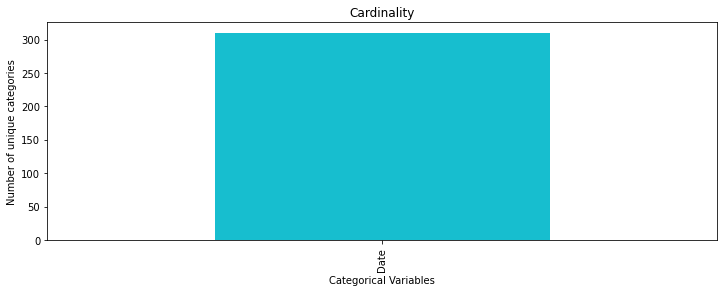

In [199]:
df[categorical_features].nunique().plot.bar(figsize=(12,4),color='#17becf')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

###### check for outliers

###### ---for numerical variables

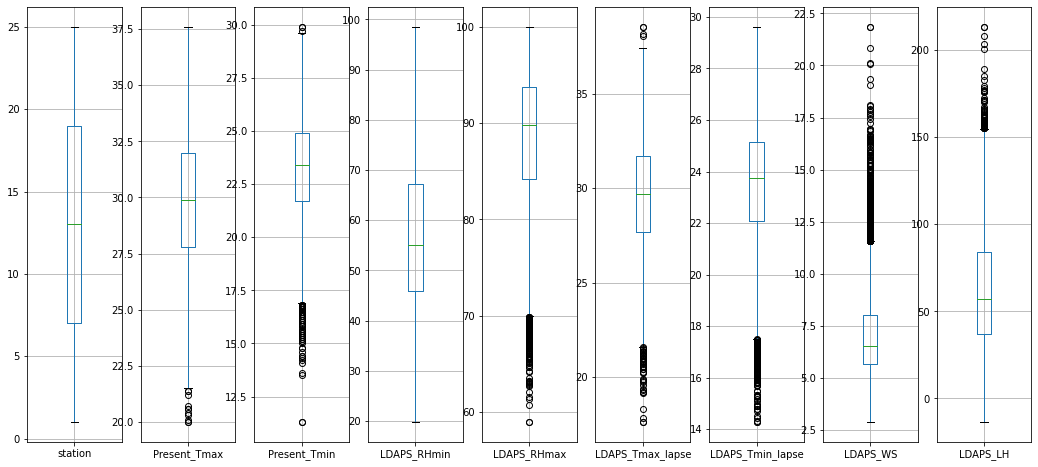

In [200]:
col1=['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH']
fig, pltcan=plt.subplots(nrows=1, ncols=len(col1), figsize=(18,8))
for predcol , i in zip(col1, range(len(col1))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

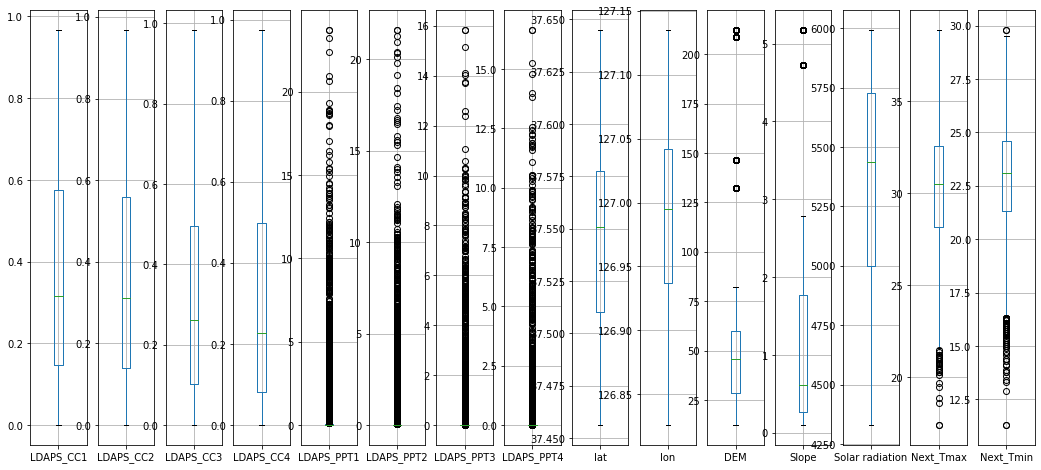

In [201]:
col1=['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']
fig, pltcan=plt.subplots(nrows=1, ncols=len(col1), figsize=(18,8))
for predcol , i in zip(col1, range(len(col1))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

*Observation :*<br>*LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin column have outliers*

###### check for skewness

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64


<AxesSubplot:>

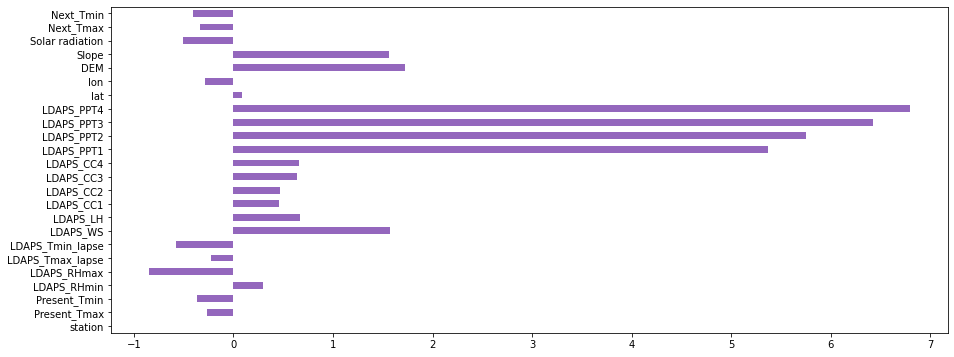

In [202]:
print(df.skew())
df.skew().plot(kind='barh',color='#9467bd',figsize=(15,6))

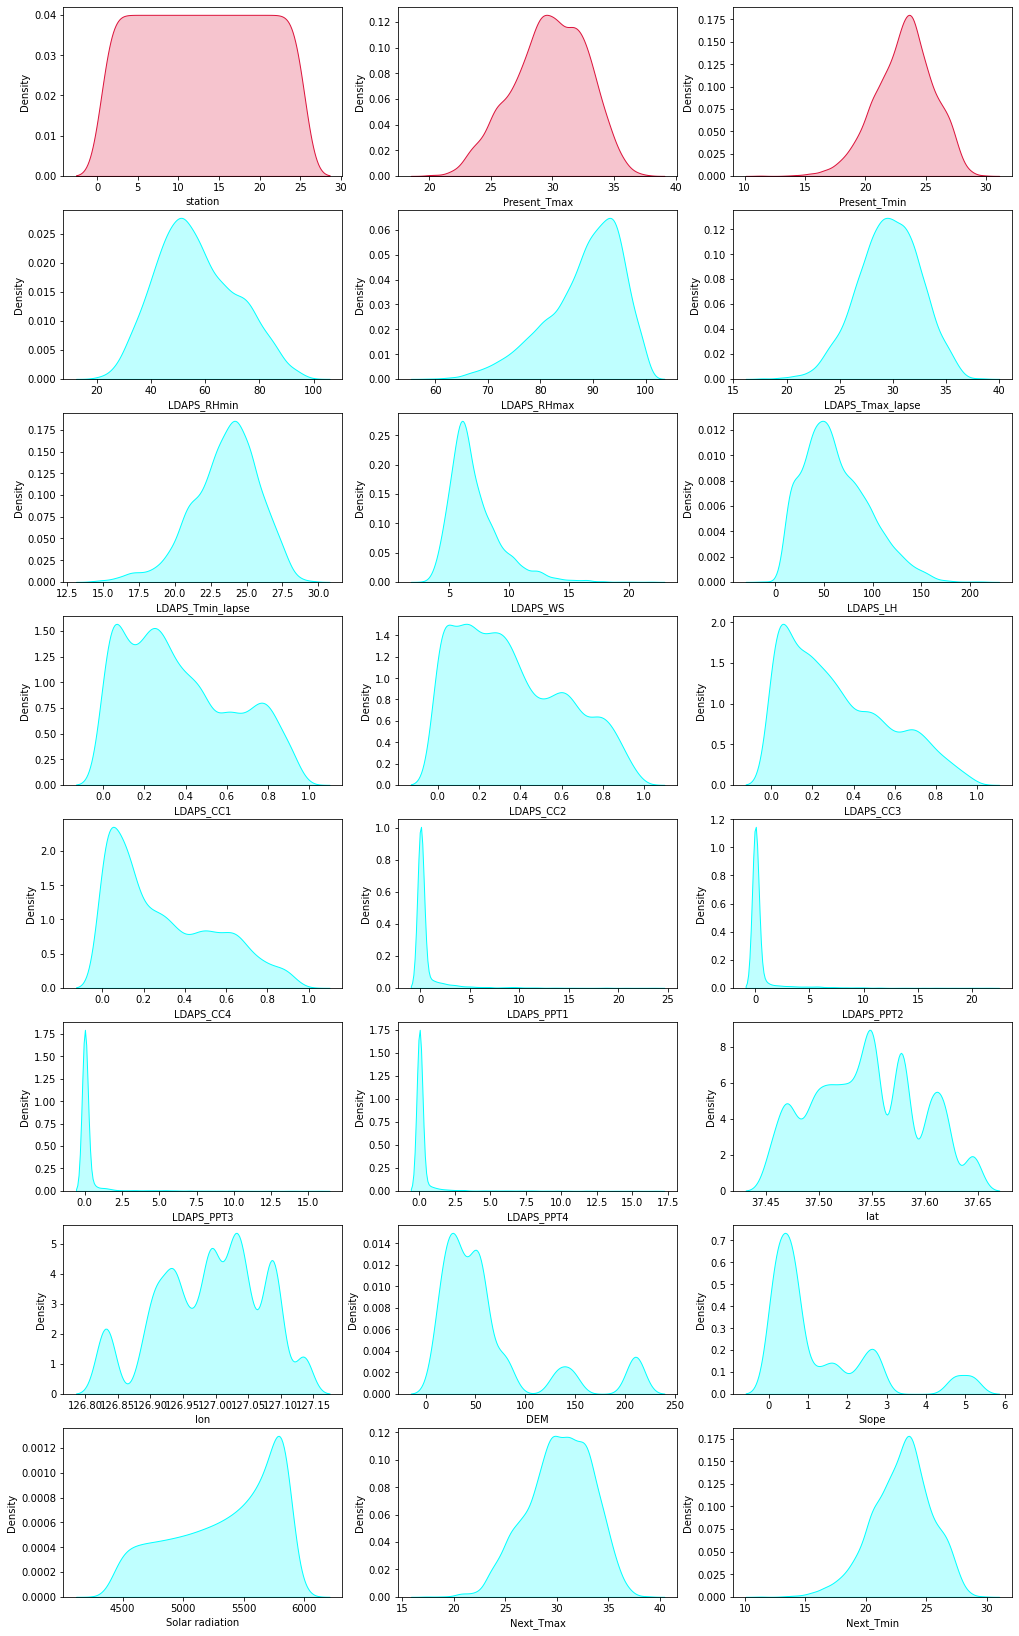

In [203]:
#Visualization of Skewness (numerical variable)
plt.figure(figsize=(17,89))
plt.subplot(24,3,1)
sns.kdeplot(df['station'],color='crimson',shade=True)
plt.subplot(24,3,2)
sns.kdeplot(df['Present_Tmax'],color='crimson',shade=True)
plt.subplot(24,3,3)
sns.kdeplot(df['Present_Tmin'],color='crimson',shade=True)
plt.subplot(24,3,4)
sns.kdeplot(df['LDAPS_RHmin'],color='aqua',shade=True)
plt.subplot(24,3,5)
sns.kdeplot(df['LDAPS_RHmax'],color='aqua',shade=True)
plt.subplot(24,3,6)
sns.kdeplot(df['LDAPS_Tmax_lapse'],color='aqua',shade=True)
plt.subplot(24,3,7)
sns.kdeplot(df['LDAPS_Tmin_lapse'],color='aqua',shade=True)
plt.subplot(24,3,8)
sns.kdeplot(df['LDAPS_WS'],color='aqua',shade=True)
plt.subplot(24,3,9)
sns.kdeplot(df['LDAPS_LH'],color='aqua',shade=True)
plt.subplot(24,3,10)
sns.kdeplot(df['LDAPS_CC1'],color='aqua',shade=True)
plt.subplot(24,3,11)
sns.kdeplot(df['LDAPS_CC2'],color='aqua',shade=True)
plt.subplot(24,3,12)
sns.kdeplot(df['LDAPS_CC3'],color='aqua',shade=True)
plt.subplot(24,3,13)
sns.kdeplot(df['LDAPS_CC4'],color='aqua',shade=True)
plt.subplot(24,3,14)
sns.kdeplot(df['LDAPS_PPT1'],color='aqua',shade=True)
plt.subplot(24,3,15)
sns.kdeplot(df['LDAPS_PPT2'],color='aqua',shade=True)
plt.subplot(24,3,16)
sns.kdeplot(df['LDAPS_PPT3'],color='aqua',shade=True)
plt.subplot(24,3,17)
sns.kdeplot(df['LDAPS_PPT4'],color='aqua',shade=True)
plt.subplot(24,3,18)
sns.kdeplot(df['lat'],color='aqua',shade=True)
plt.subplot(24,3,19)
sns.kdeplot(df['lon'],color='aqua',shade=True)
plt.subplot(24,3,20)
sns.kdeplot(df['DEM'],color='aqua',shade=True)
plt.subplot(24,3,21)
sns.kdeplot(df['Slope'],color='aqua',shade=True)
plt.subplot(24,3,22)
sns.kdeplot(df['Solar radiation'],color='aqua',shade=True)
plt.subplot(24,3,23)
sns.kdeplot(df['Next_Tmax'],color='aqua',shade=True)
plt.subplot(24,3,24)
sns.kdeplot(df['Next_Tmin'],color='aqua',shade=True)
plt.show()

*Observation :*<br>*Skewness is present in columns*

###### Identify Target and Feature Variable

*Prediction-*<br>*Next day maximum and minimum temperature*

*Targe Variable (Dependent Features) :*<br>          *- Next_Tmax: Next day maximum temperature*
<br>                                                  *-Next_Tmin: Next day  minimum temperature* 
<br>
*Predictors (Independent Features)    :*<br>               *- All variables* 

###### Univariate Analysis

###### 1. station variable

<AxesSubplot:>

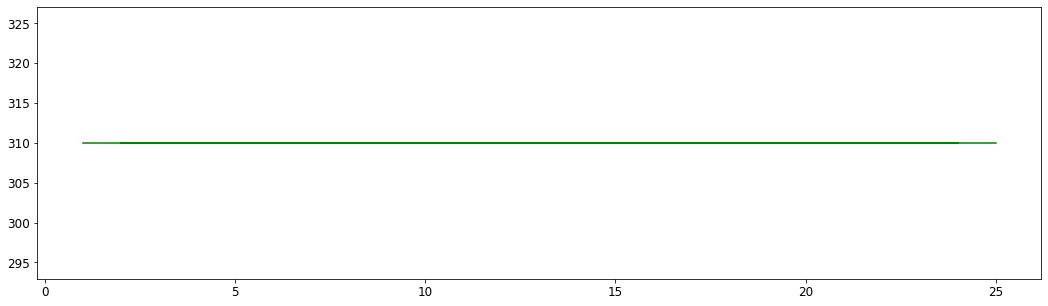

In [204]:
df['station'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='green')

*Observation :*<br>*all have equal count*

###### 2. Date variable

<AxesSubplot:>

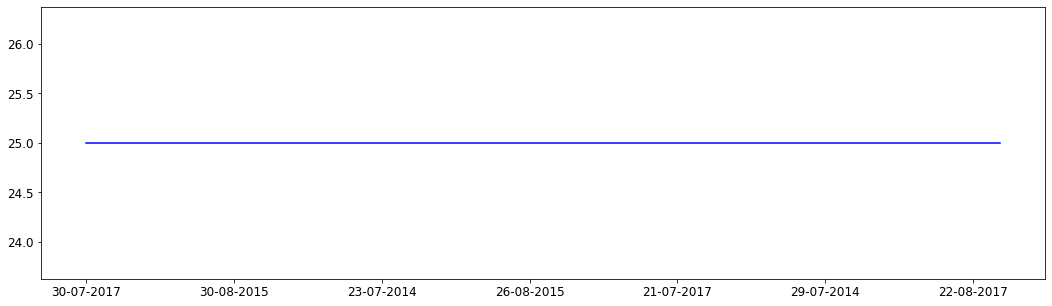

In [205]:
df['Date'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='blue')

*Observation :*<br>*all have equal count*

###### 3. Present_Tmax variable

<AxesSubplot:>

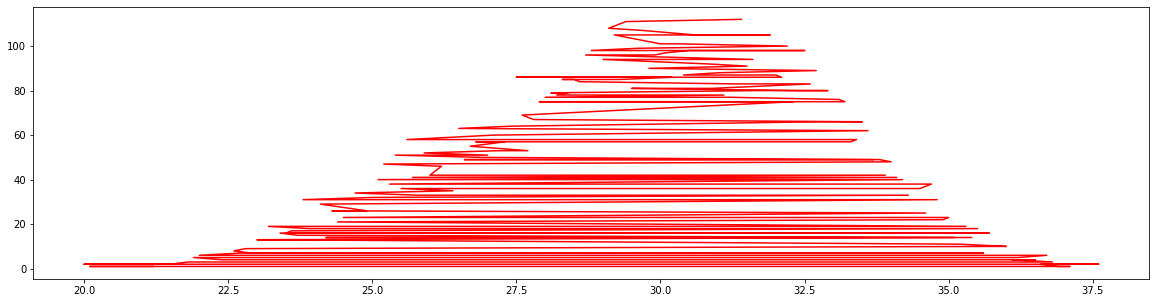

In [206]:
df['Present_Tmax'].value_counts().plot(kind = "line",fontsize=10,figsize=(20,5),color='red')

*Observation :*<br>*from range 27.5 to 35 it maximum*

###### 4. Present_Tmin variable

<AxesSubplot:>

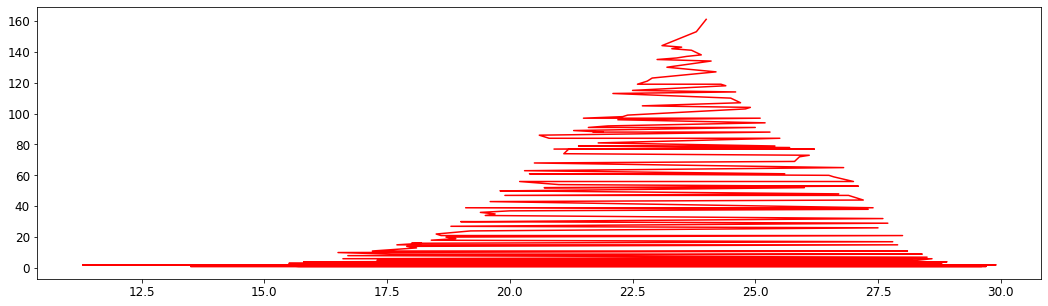

In [207]:
df['Present_Tmin'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='red')

*Observation :*<br>*from range 22 to 25 it maximum*

###### 5. LDAPS_RHmin variable

<AxesSubplot:ylabel='Frequency'>

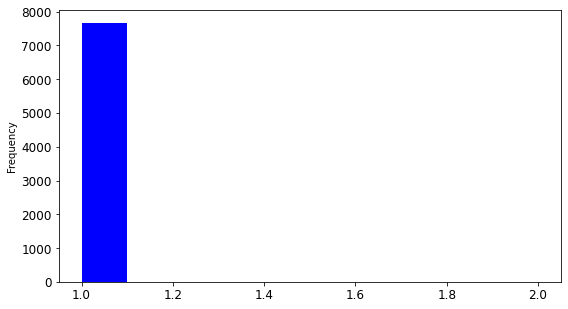

In [302]:
df['LDAPS_RHmin'].value_counts().plot(kind = "hist",fontsize=12,figsize=(9,5),color='blue')

*Observation :*<br>*maxmiumn at the 1.0 to 1.5*

###### 6. LDAPS_RHmax variable

<AxesSubplot:ylabel='Frequency'>

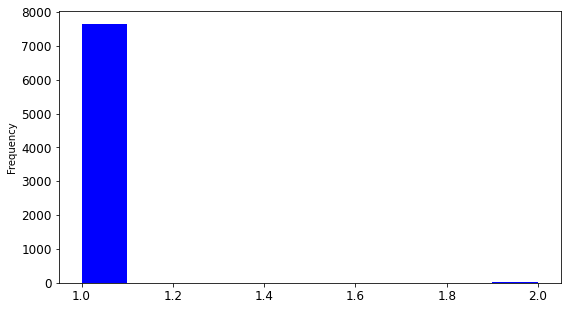

In [209]:
df['LDAPS_RHmax'].value_counts().plot(kind = "hist",fontsize=12,figsize=(9,5),color='blue')

*Observation :*<br>*maxmiumn at the 1.0 to 1.5*

###### 7. LDAPS_Tmax_lapse variable

<AxesSubplot:>

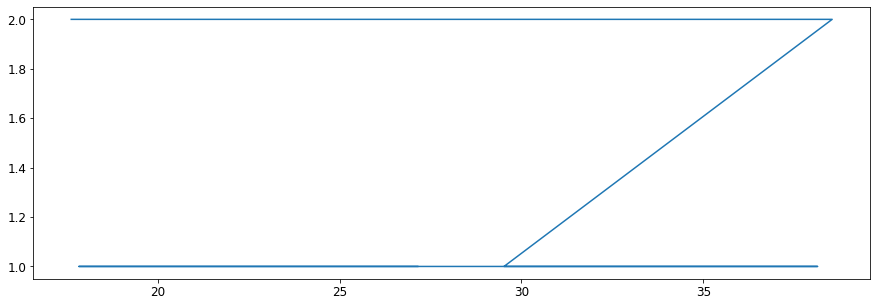

In [210]:
df['LDAPS_Tmax_lapse'].value_counts().plot(kind = "line",fontsize=12,figsize=(15,5))

In [ ]:
*Observation :*<br>**

###### 8. LDAPS_Tmin_lapse variable

<AxesSubplot:>

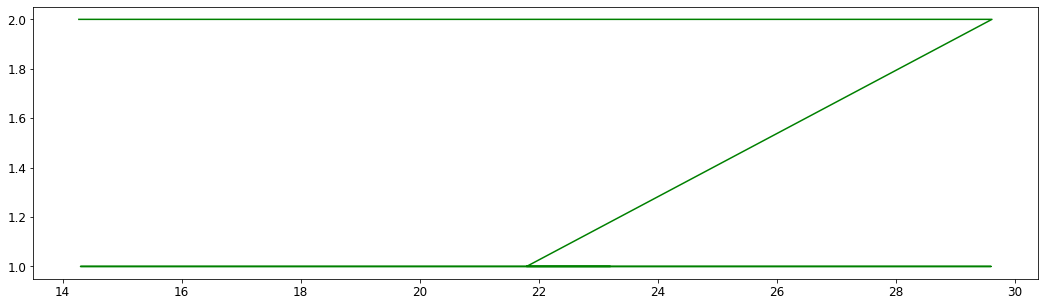

In [211]:
df['LDAPS_Tmin_lapse'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='green')

###### 9. LDAPS_WS variable

<AxesSubplot:>

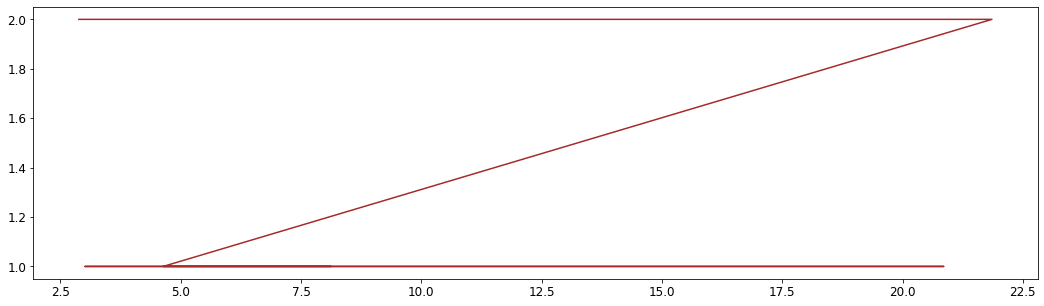

In [212]:
df['LDAPS_WS'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='brown')

###### 10. LDAPS_LH variable

<AxesSubplot:>

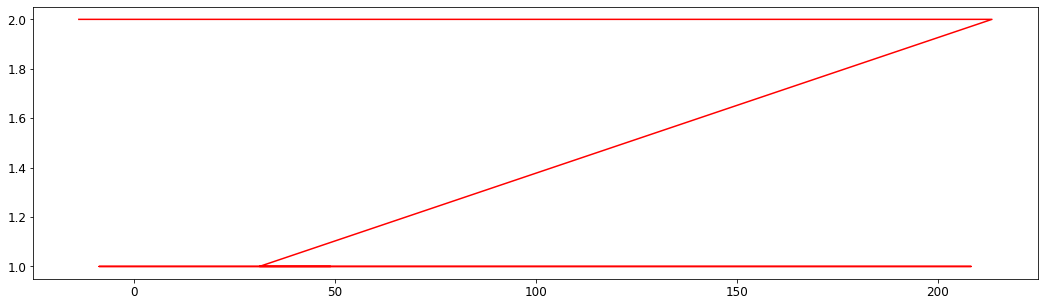

In [213]:
df['LDAPS_LH'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='red')

###### 11 LDAPS_CC1 variable

<AxesSubplot:>

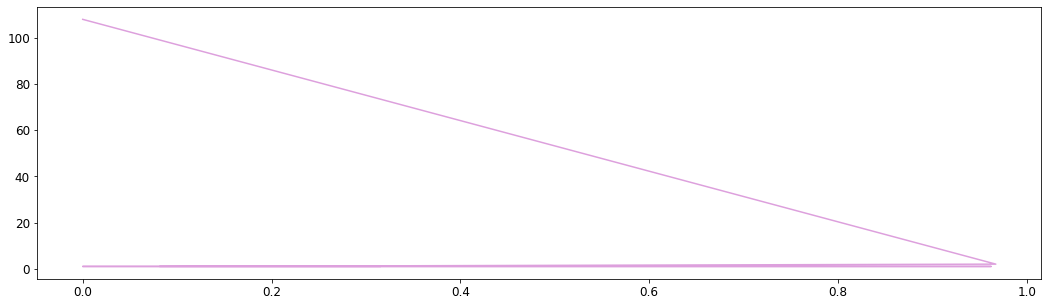

In [214]:
df['LDAPS_CC1'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='plum')

###### 12. LDAPS_CC2 variable

<AxesSubplot:>

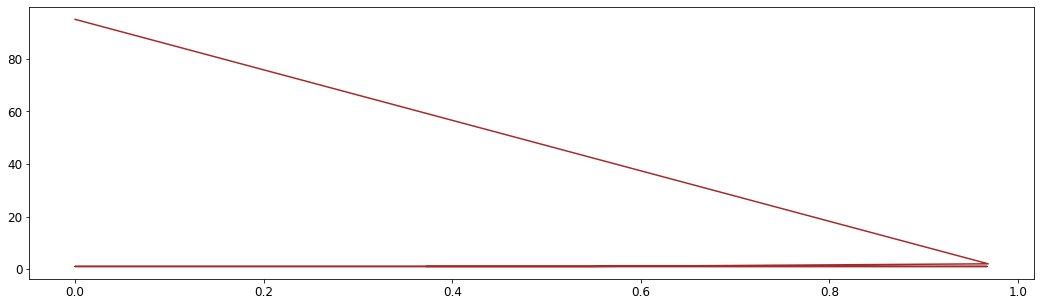

In [215]:
df['LDAPS_CC2'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='brown')

###### 13. LDAPS_CC3 variable

<AxesSubplot:>

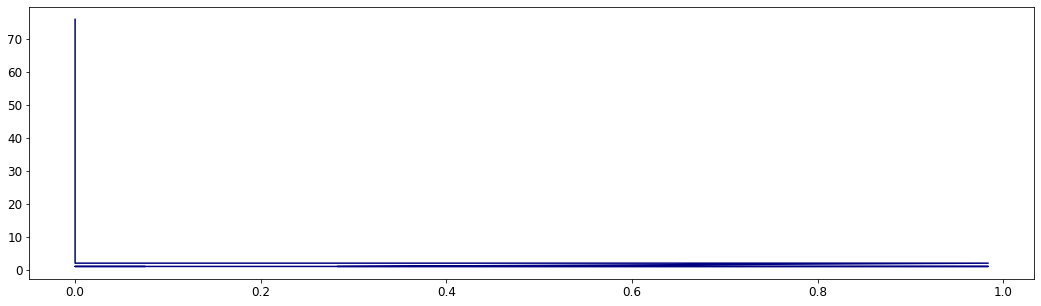

In [216]:
df['LDAPS_CC3'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='navy')

###### 14. LDAPS_CC4 variable

<AxesSubplot:>

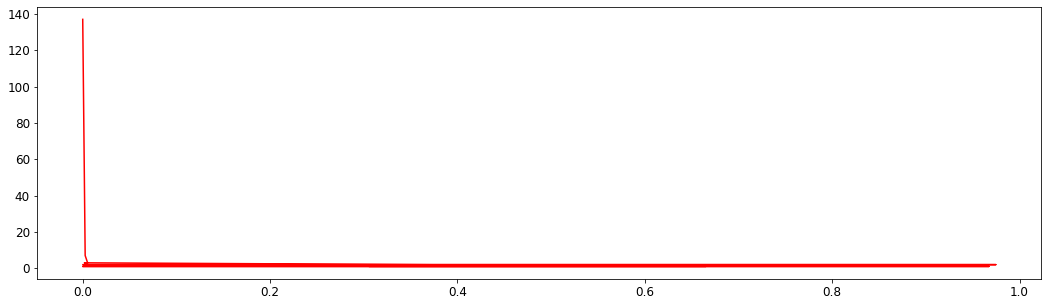

In [217]:
df['LDAPS_CC4'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='red')

###### 15. LDAPS_PPT1 variable

<AxesSubplot:>

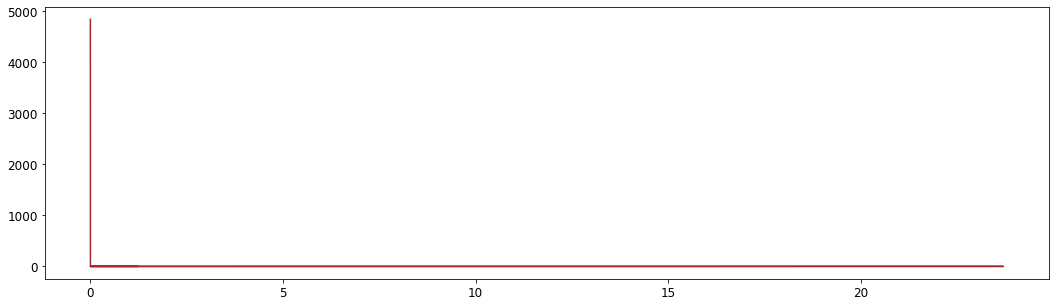

In [218]:
df['LDAPS_PPT1'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='brown')

###### 16. LDAPS_PPT2 variable

<AxesSubplot:>

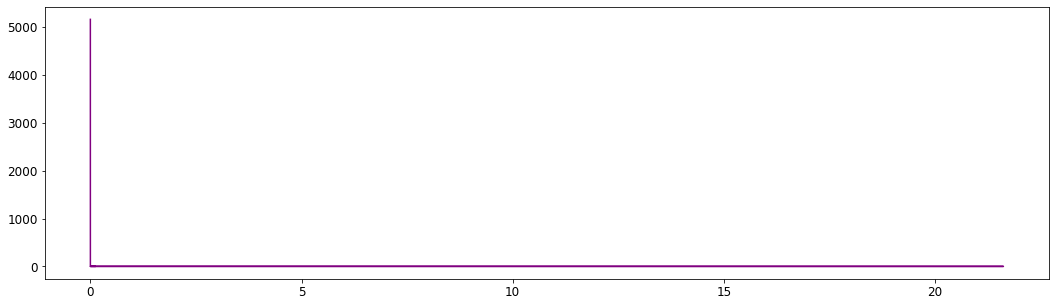

In [219]:
df['LDAPS_PPT2'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='purple')

###### 17. LDAPS_PPT3 variable

<AxesSubplot:>

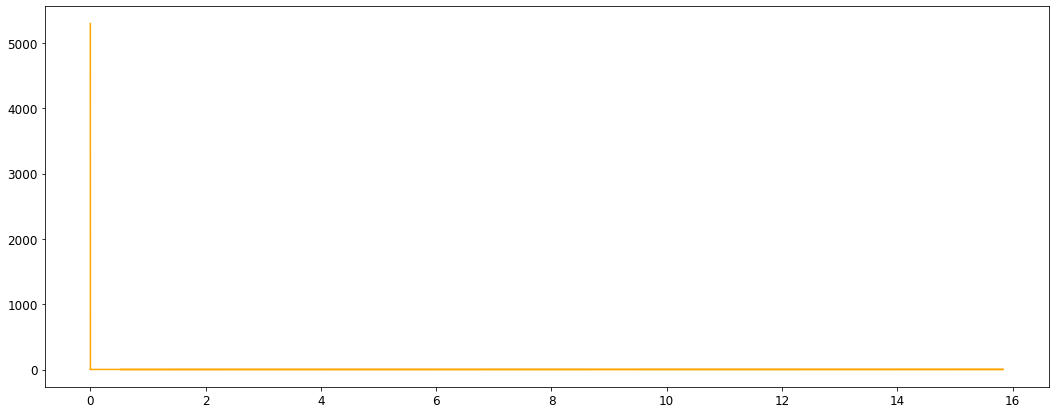

In [220]:
df['LDAPS_PPT3'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,7),color='orange')

###### 18. LDAPS_PPT4 variable

<AxesSubplot:>

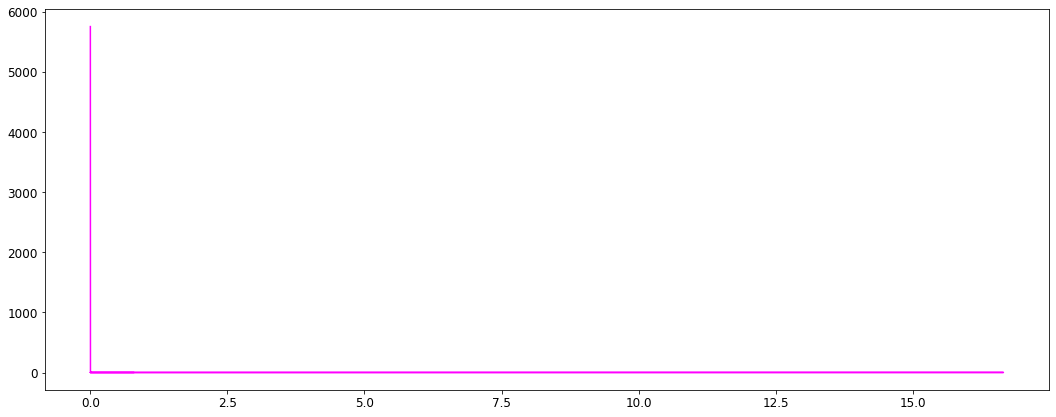

In [221]:
df['LDAPS_PPT4'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,7),color='magenta')

###### 19. lat variable

<AxesSubplot:>

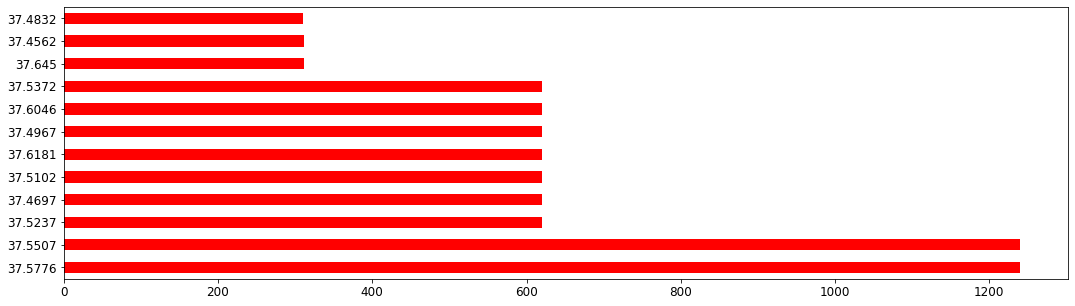

In [222]:
df['lat'].value_counts().plot(kind = "barh",fontsize=12,figsize=(18,5),color='red')

###### 20. lon variable

<AxesSubplot:>

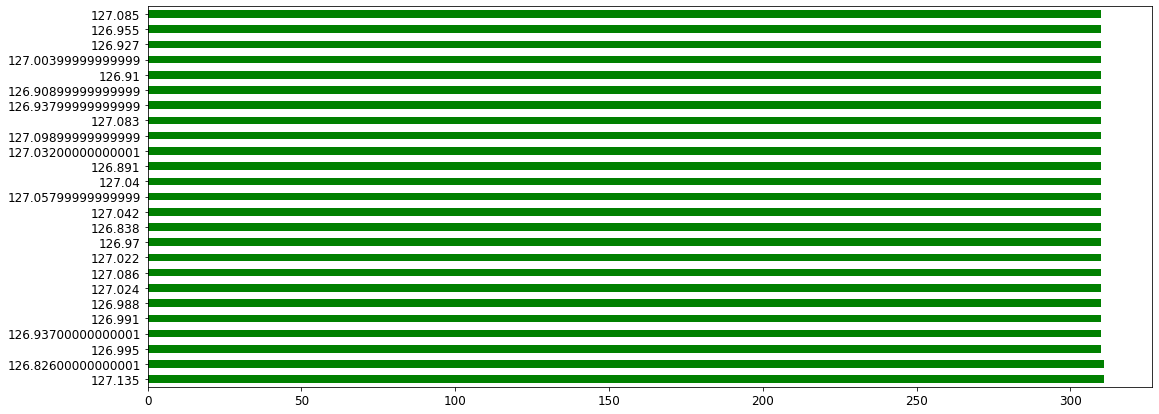

In [223]:
df['lon'].value_counts().plot(kind ="barh",fontsize=12,figsize=(18,7),color='green')

###### 21. DEM variable

<AxesSubplot:>

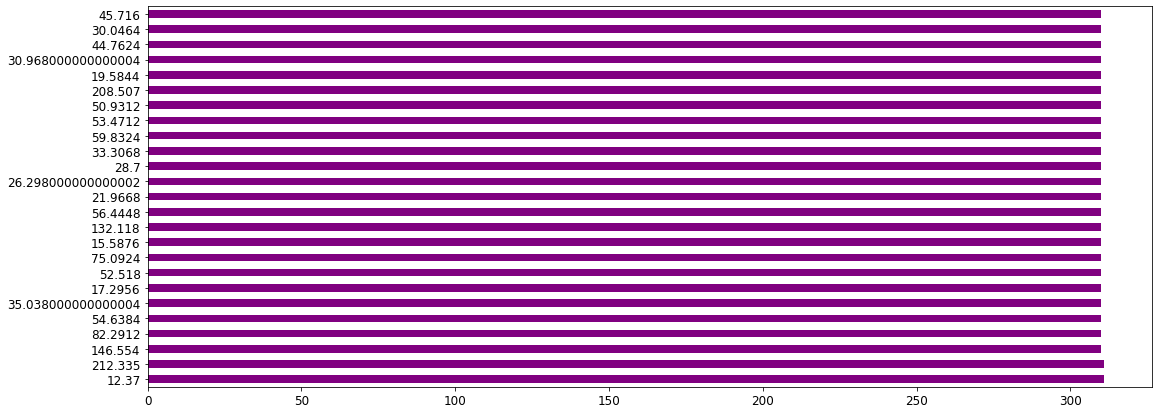

In [224]:
df['DEM'].value_counts().plot(kind = 'barh',fontsize=12,figsize=(18,7),color='purple')

###### 22. Slope variable

<AxesSubplot:>

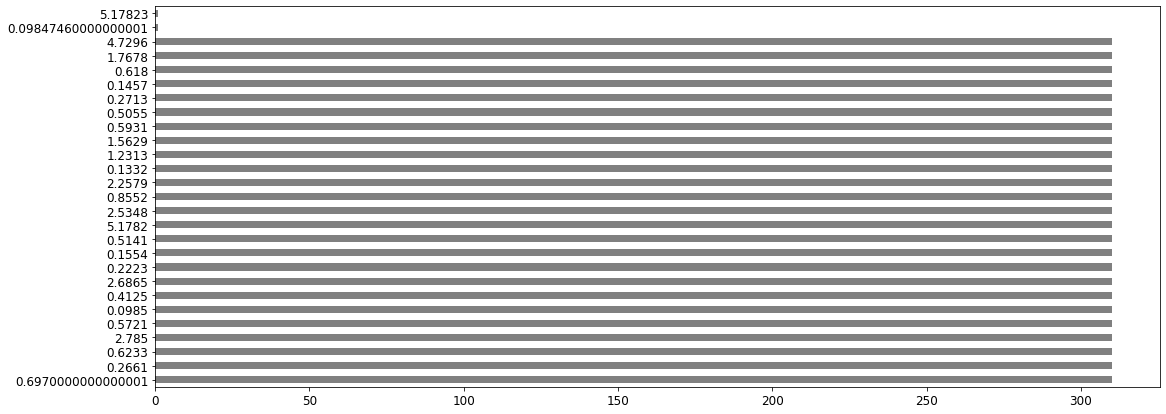

In [225]:
df['Slope'].value_counts().plot(kind = 'barh',fontsize=12,figsize=(18,7),color='grey')

###### 23. Solar radiation variable

<AxesSubplot:>

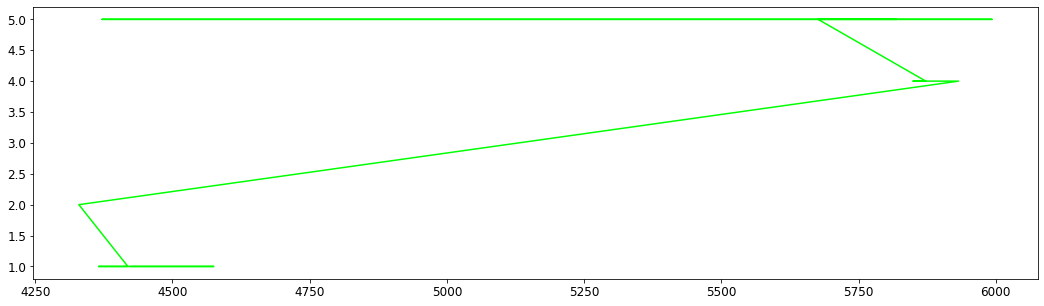

In [226]:
df['Solar radiation'].value_counts().plot(kind = 'line',fontsize=12,figsize=(18,5),color='lime')

###### 24. Next_Tmax variable

<AxesSubplot:>

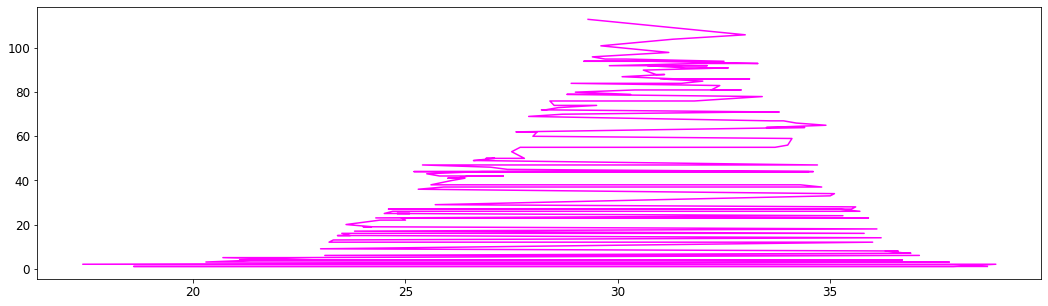

In [227]:
df['Next_Tmax'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='magenta')

###### 25. Next_Tmin variable

<AxesSubplot:>

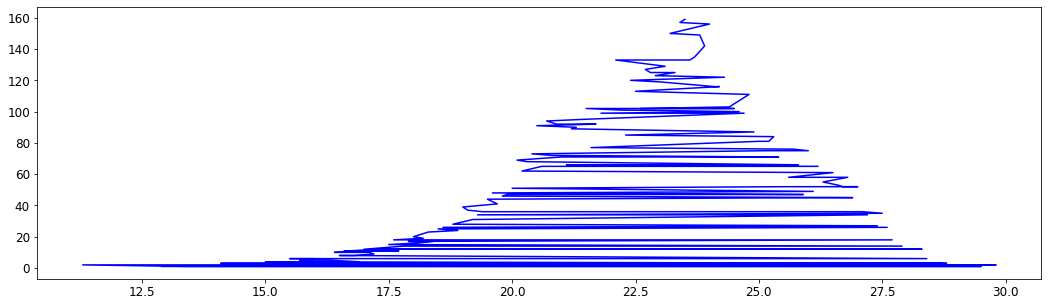

In [228]:
df['Next_Tmin'].value_counts().plot(kind = 'line',fontsize=12,figsize=(18,5),color='blue')

###### Bivariate Analysis

###### 1. Next_Tmax
            Vs station
            Vs Date
            Vs Present_Tmax
            Vs Present_Tmin
            Vs LDAPS_RHmin
            VS LDAPS_RHmax
            Vs LDAPS_Tmax_lapse
            Vs LDAPS_Tmin_lapse
            Vs LDAPS_WS
            VS LDAPS_LH
            Vs LDAPS_CC1
            VS LDAPS_CC2
            VS LDAPS_CC3
            VS LDAPS_CC4
            VS LDAPS_PPT1
            Vs LDAPS_PPT2
            Vs LDAPS_PPT3
            VS LDAPS_PPT4
            VS lat
            VS lon
            VS DEM
            Vs Slope
            VS Solar radiation

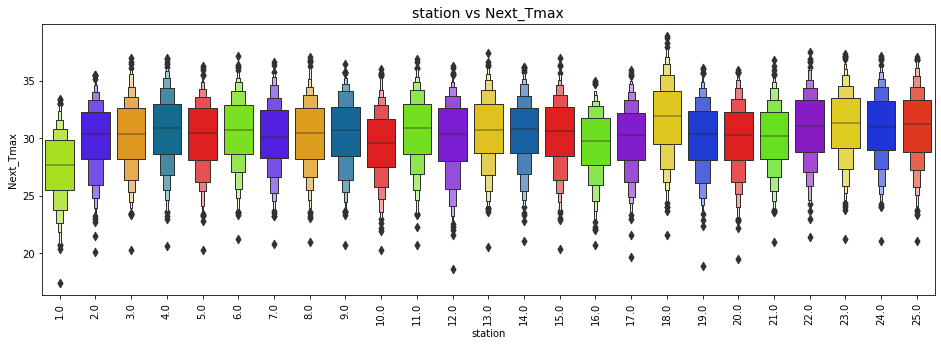

In [233]:
plt.figure(figsize=(16,5))
sns.boxenplot(df['station'], df['Next_Tmax'], palette='prism')
plt.title('station vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

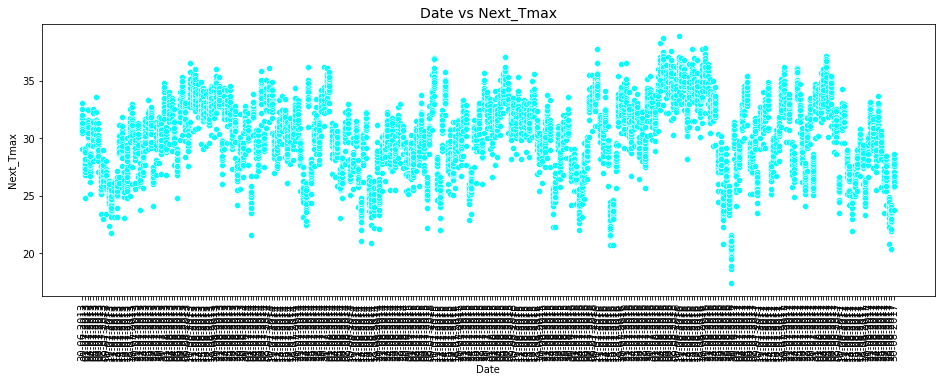

In [267]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['Date'], df['Next_Tmax'], color='aqua')
plt.title('Date vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

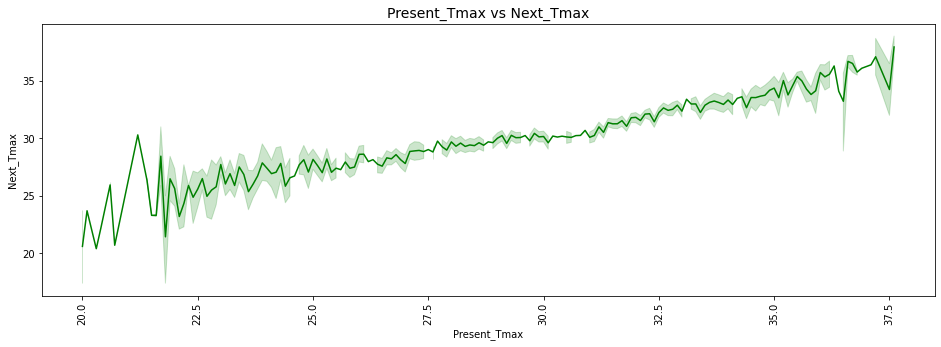

In [236]:
plt.figure(figsize=(16,5))
sns.lineplot(df['Present_Tmax'], df['Next_Tmax'],color='green')
plt.title('Present_Tmax vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

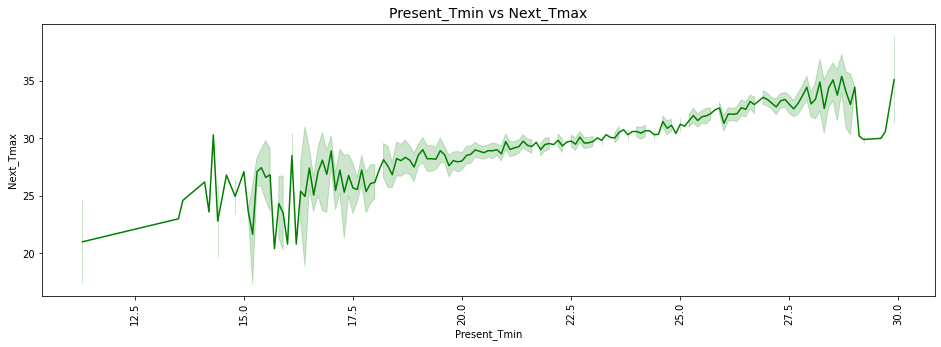

In [237]:
plt.figure(figsize=(16,5))
sns.lineplot(df['Present_Tmin'], df['Next_Tmax'],color='green')
plt.title('Present_Tmin vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

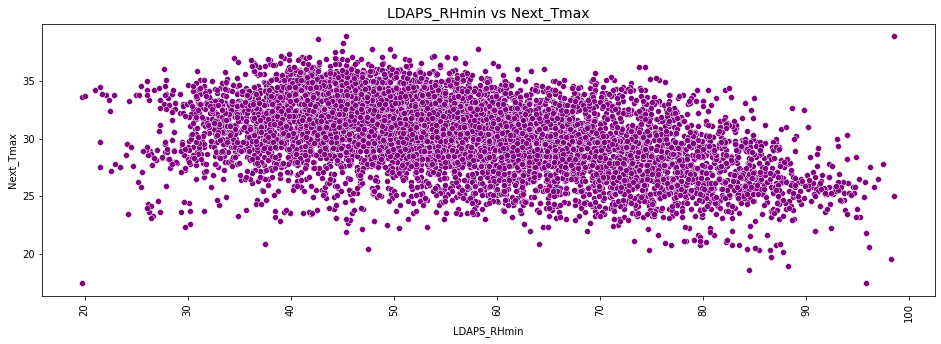

In [269]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_RHmin'], df['Next_Tmax'],color='purple')
plt.title('LDAPS_RHmin vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

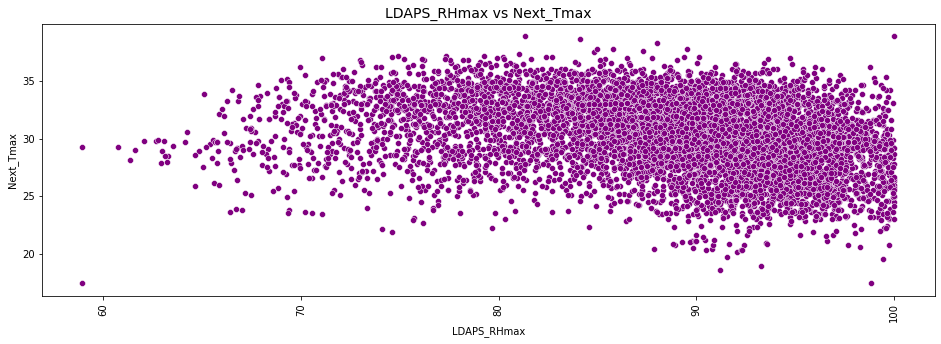

In [270]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_RHmax'], df['Next_Tmax'], color='purple')
plt.title('LDAPS_RHmax vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

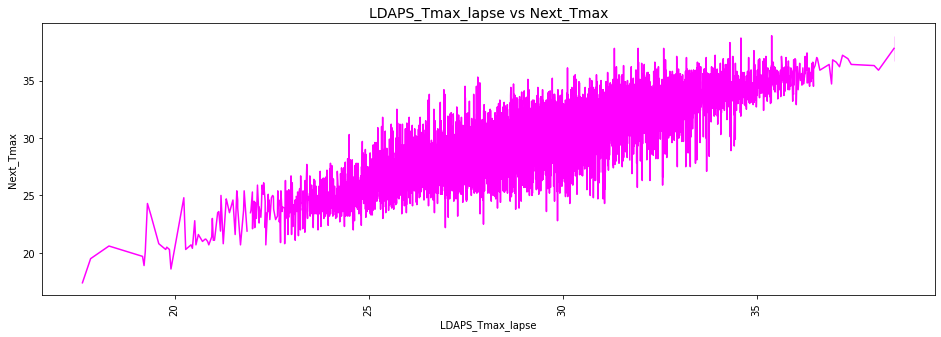

In [240]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_Tmax_lapse'], df['Next_Tmax'],color='magenta')# palette='binary_r')
plt.title('LDAPS_Tmax_lapse vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

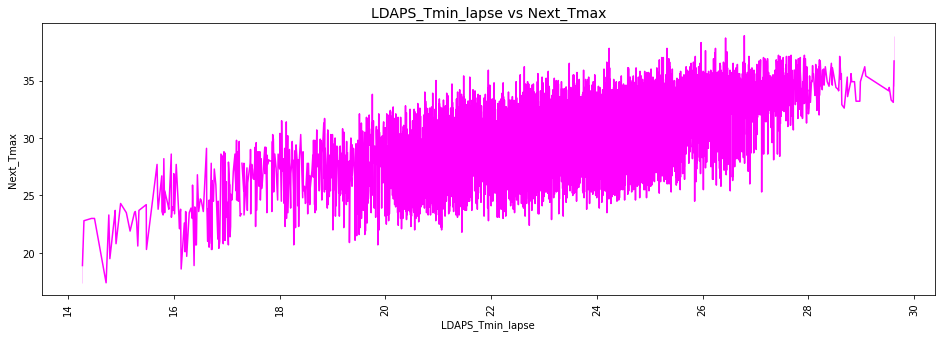

In [241]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_Tmin_lapse'], df['Next_Tmax'], color='magenta')#palette='binary_r')
plt.title('LDAPS_Tmin_lapse vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

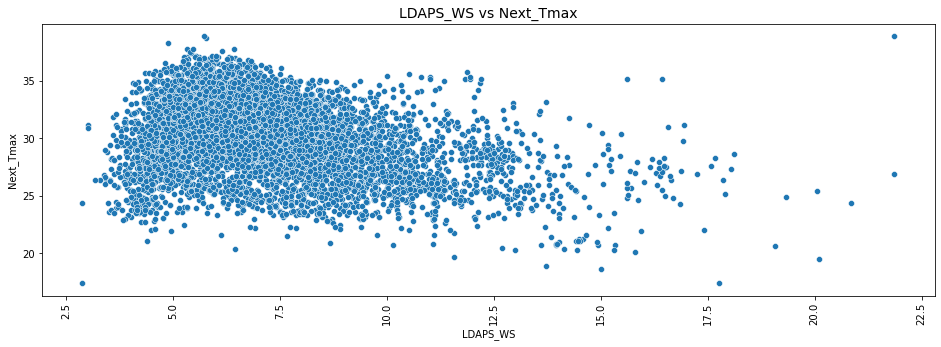

In [246]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_WS'], df['Next_Tmax'], palette='binary_r')
plt.title('LDAPS_WS vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

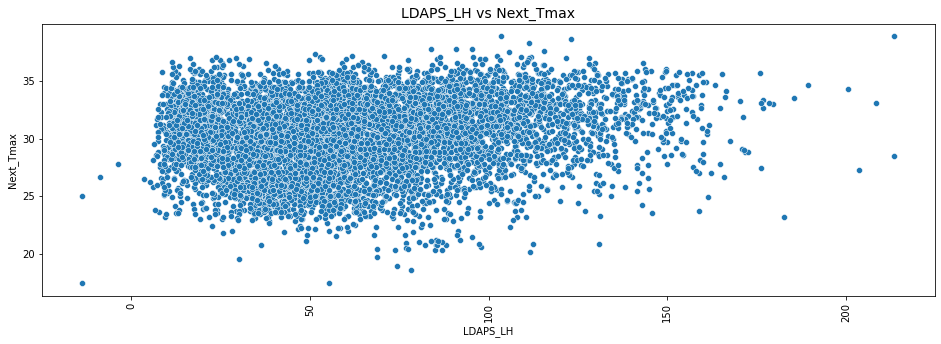

In [247]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_LH'], df['Next_Tmax'], palette='binary_r')
plt.title('LDAPS_LH vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

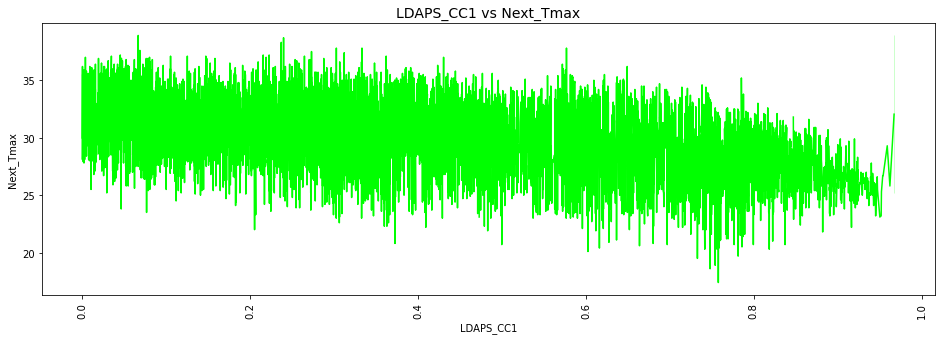

In [249]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_CC1'], df['Next_Tmax'], color='lime')#palette='binary_r')
plt.title('LDAPS_CC1 vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

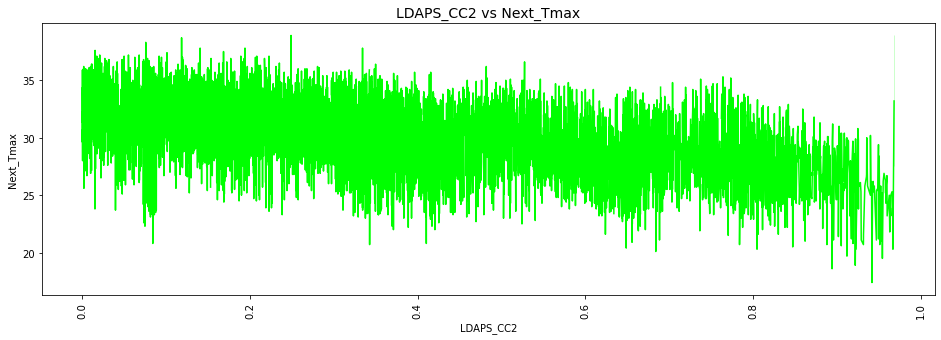

In [250]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_CC2'], df['Next_Tmax'],color='lime')# palette='binary_r')
plt.title('LDAPS_CC2 vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

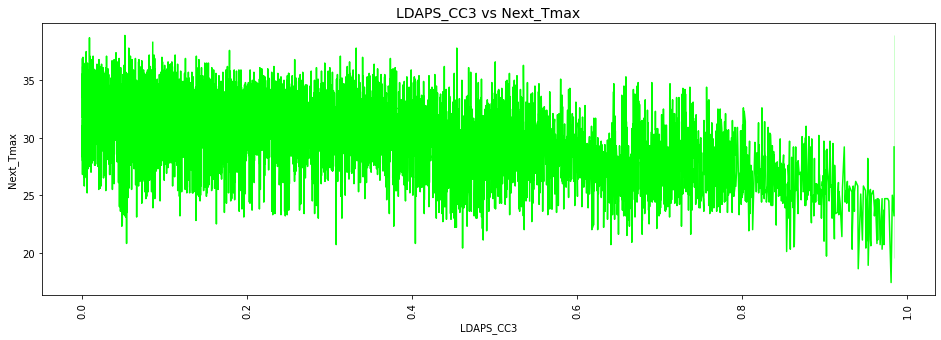

In [252]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_CC3'], df['Next_Tmax'],color='lime')# palette='binary_r')
plt.title('LDAPS_CC3 vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

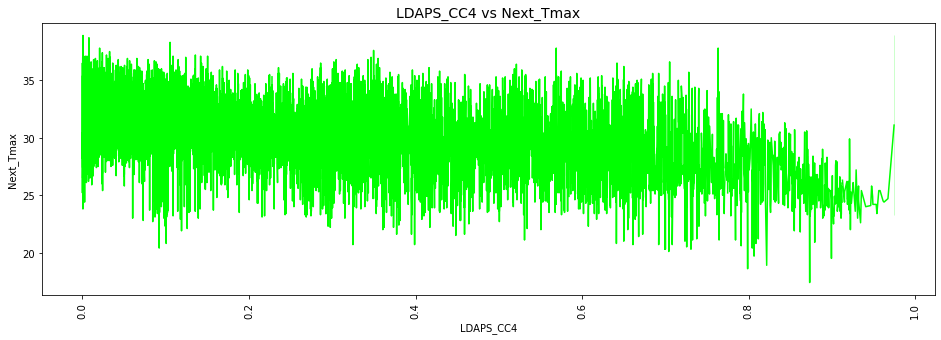

In [253]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_CC4'], df['Next_Tmax'],color='lime')# palette='binary_r')
plt.title('LDAPS_CC4 vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

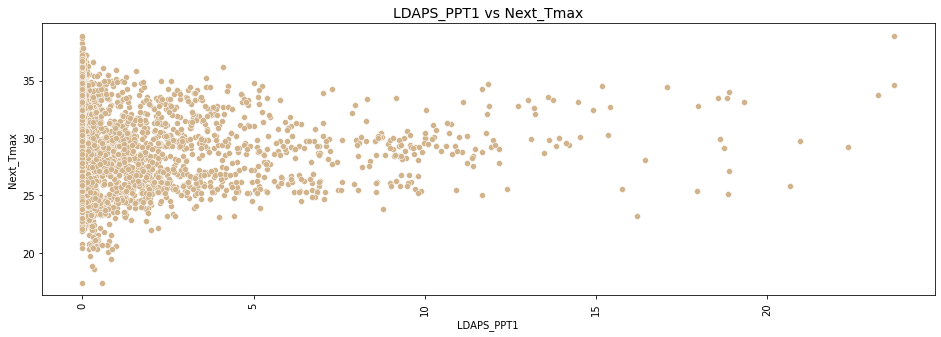

In [255]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_PPT1'], df['Next_Tmax'], color='tan')
plt.title('LDAPS_PPT1 vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

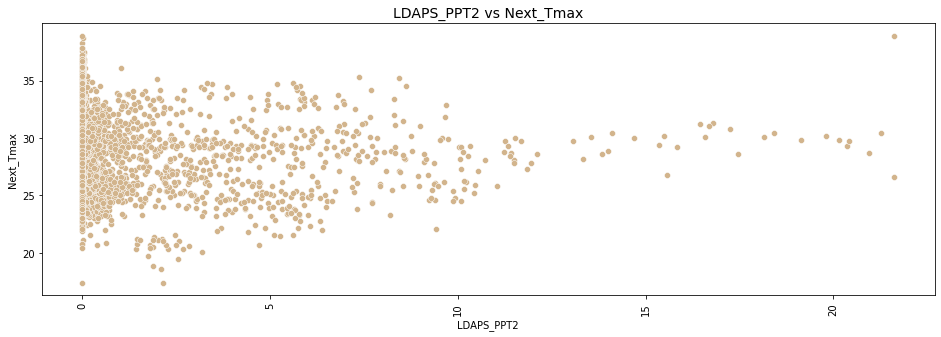

In [257]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_PPT2'], df['Next_Tmax'],color='tan')
plt.title('LDAPS_PPT2 vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

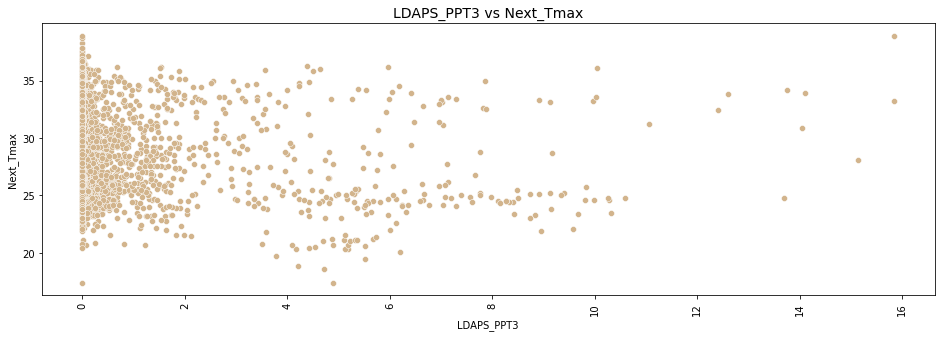

In [259]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_PPT3'], df['Next_Tmax'], color='tan')
plt.title('LDAPS_PPT3 vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

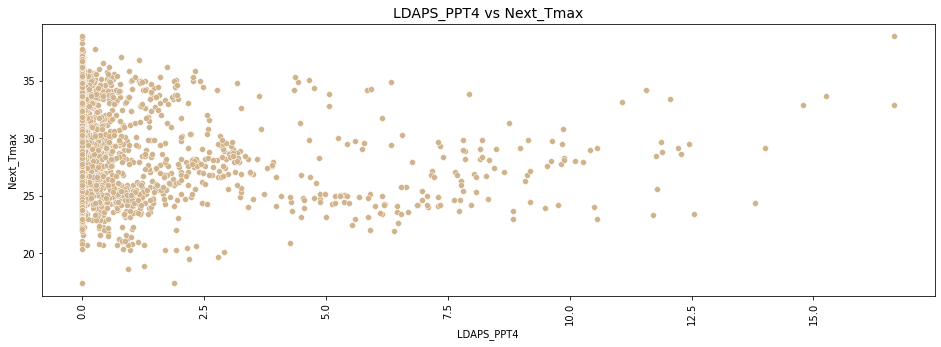

In [260]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_PPT4'], df['Next_Tmax'], color='tan')
plt.title('LDAPS_PPT4 vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

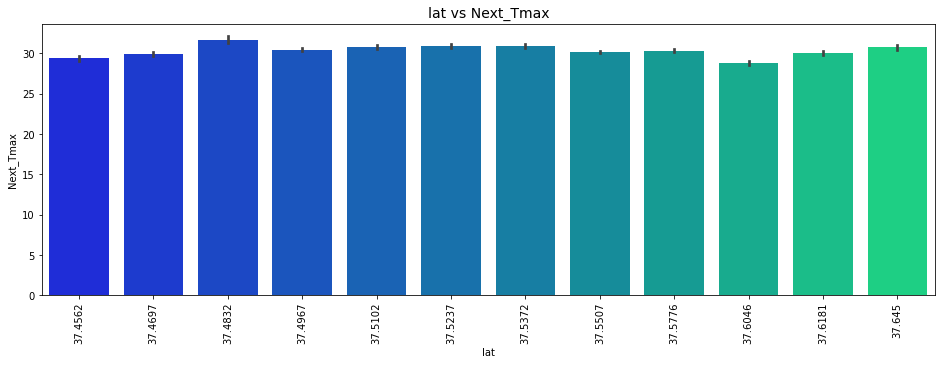

In [261]:
plt.figure(figsize=(16,5))
sns.barplot(df['lat'], df['Next_Tmax'], palette='winter')
plt.title('lat vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

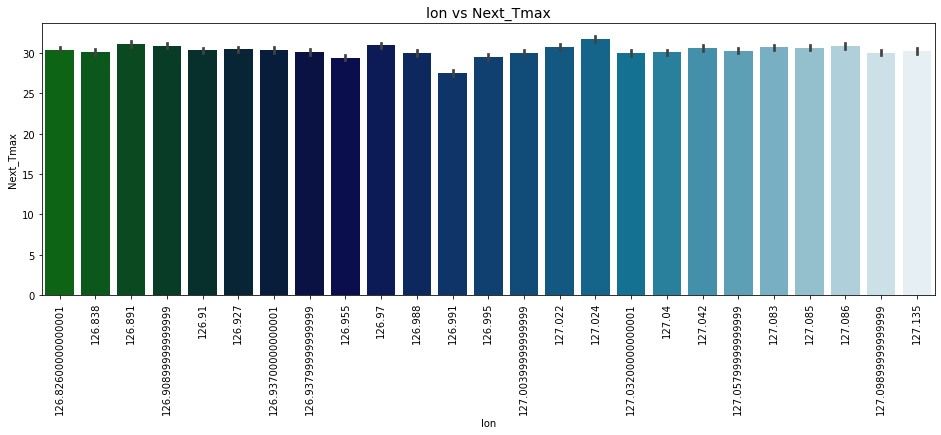

In [262]:
plt.figure(figsize=(16,5))
sns.barplot(df['lon'], df['Next_Tmax'], palette='ocean')
plt.title('lon vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

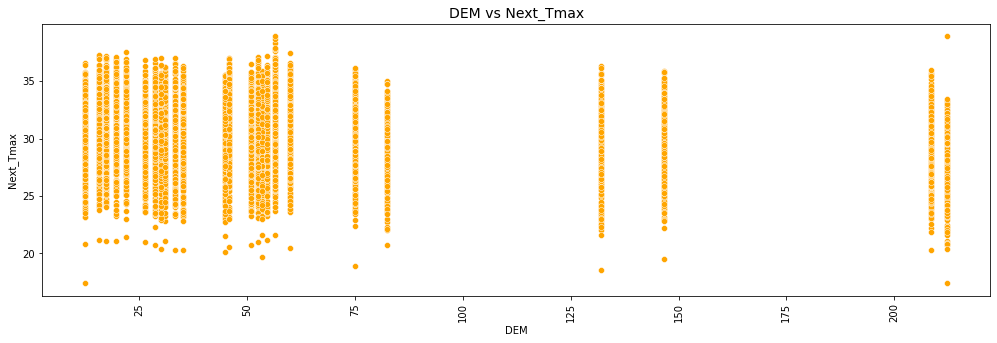

In [263]:
plt.figure(figsize=(17,5))
sns.scatterplot(df['DEM'], df['Next_Tmax'],color='orange')
plt.title('DEM vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

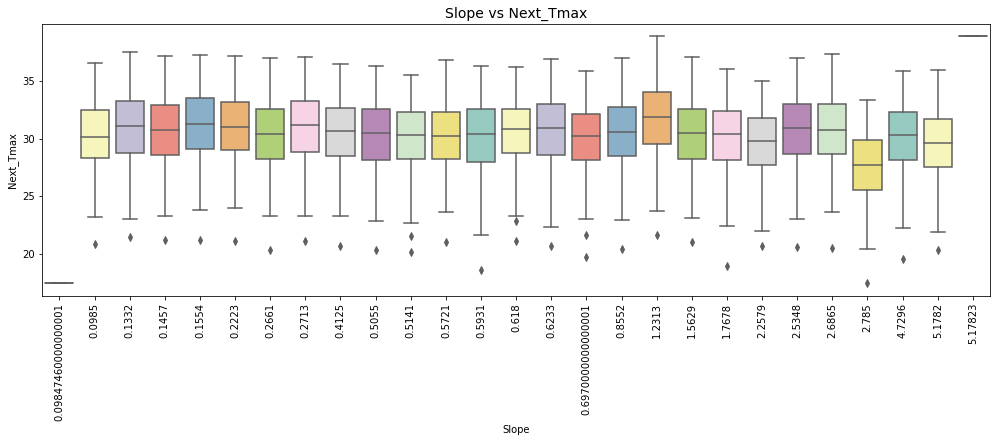

In [264]:
plt.figure(figsize=(17,5))
sns.boxplot(df['Slope'], df['Next_Tmax'], palette='Set3')
plt.title('Slope vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

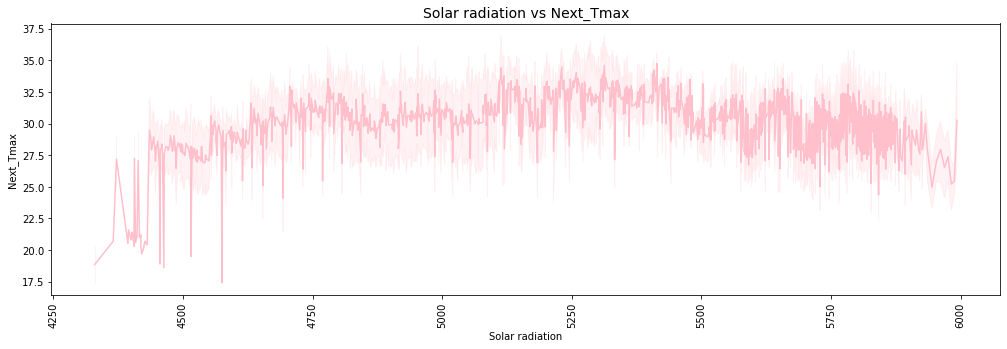

In [271]:
plt.figure(figsize=(17,5))
sns.lineplot(df['Solar radiation'], df['Next_Tmax'], color='pink')
plt.title('Solar radiation vs Next_Tmax', size=14)
plt.xticks(rotation=90)
plt.show()

###### 2.Next_Tmin
            Vs station
            Vs Date
            Vs Present_Tmax
            Vs Present_Tmin
            Vs LDAPS_RHmin
            VS LDAPS_RHmax
            Vs LDAPS_Tmax_lapse
            Vs LDAPS_Tmin_lapse
            Vs LDAPS_WS
            VS LDAPS_LH
            Vs LDAPS_CC1
            VS LDAPS_CC2
            VS LDAPS_CC3
            VS LDAPS_CC4
            VS LDAPS_PPT1
            Vs LDAPS_PPT2
            Vs LDAPS_PPT3
            VS LDAPS_PPT4
            VS lat
            VS lon
            VS DEM
            Vs Slope
            VS Solar radiation
    

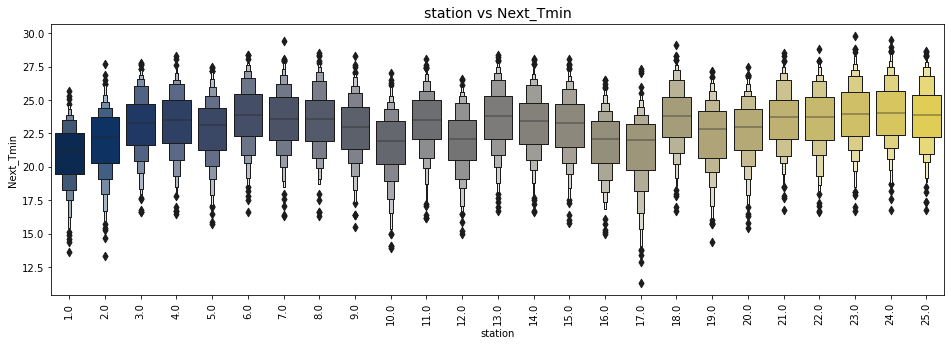

In [288]:
plt.figure(figsize=(16,5))
sns.boxenplot(df['station'], df['Next_Tmin'], palette='cividis')
plt.title('station vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

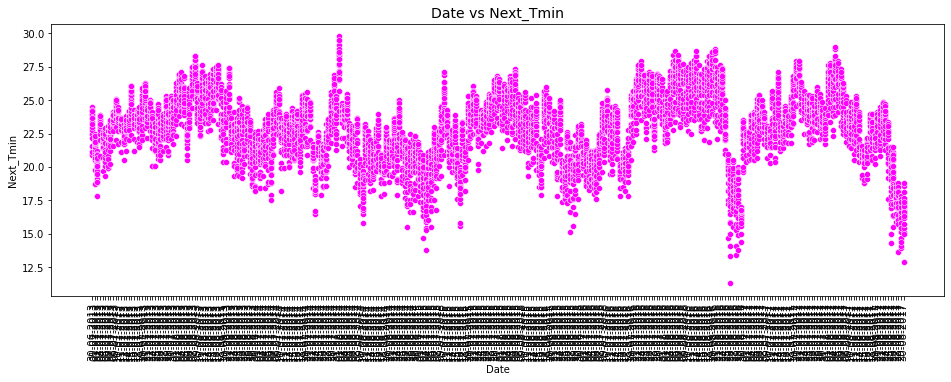

In [289]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['Date'], df['Next_Tmin'], color='magenta')
plt.title('Date vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

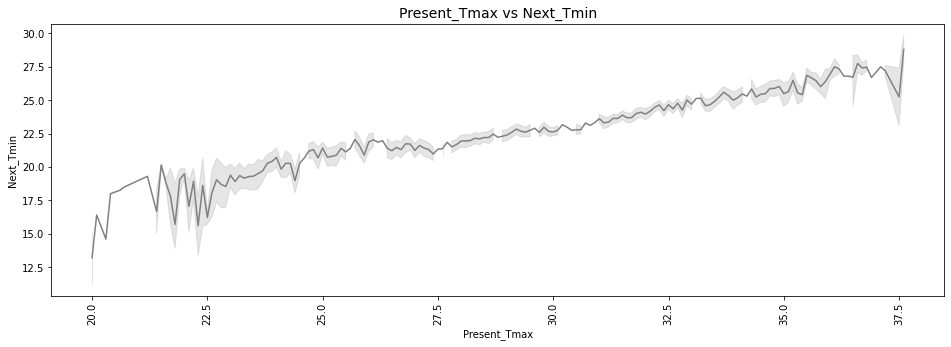

In [290]:
plt.figure(figsize=(16,5))
sns.lineplot(df['Present_Tmax'], df['Next_Tmin'],color='grey')
plt.title('Present_Tmax vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

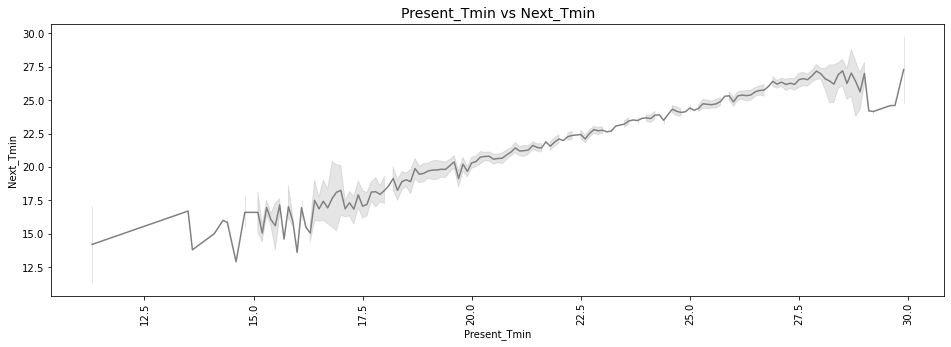

In [291]:
plt.figure(figsize=(16,5))
sns.lineplot(df['Present_Tmin'], df['Next_Tmin'],color='grey')
plt.title('Present_Tmin vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

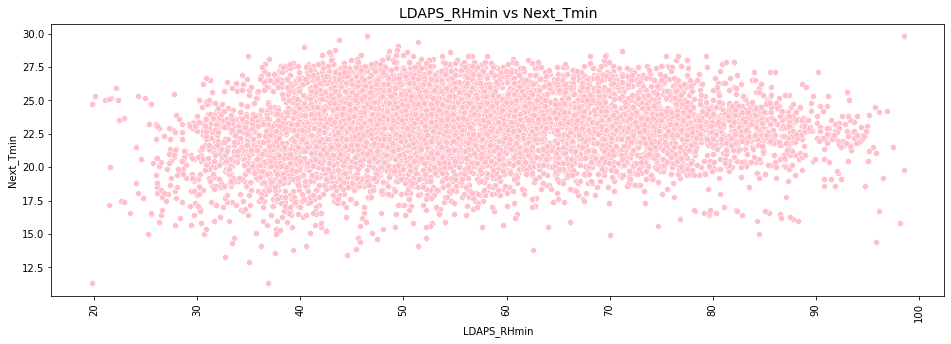

In [292]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_RHmin'], df['Next_Tmin'],color='pink')
plt.title('LDAPS_RHmin vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

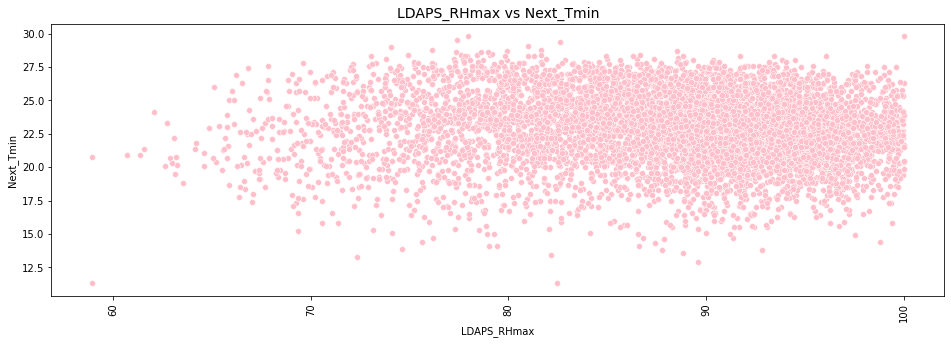

In [293]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_RHmax'], df['Next_Tmin'], color='pink')
plt.title('LDAPS_RHmax vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

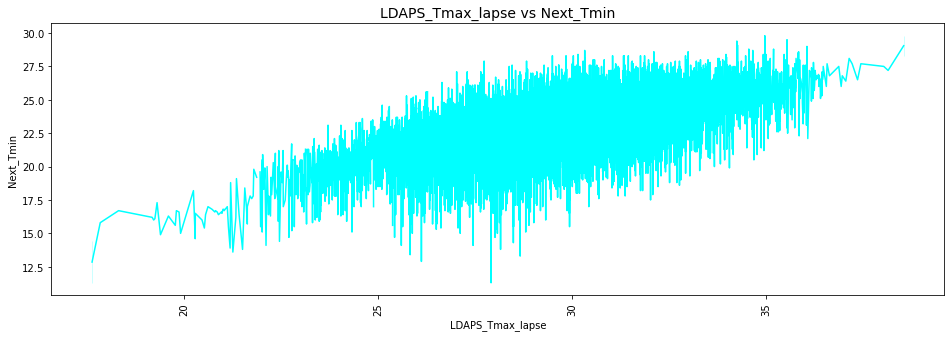

In [279]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_Tmax_lapse'], df['Next_Tmin'],color='aqua')
plt.title('LDAPS_Tmax_lapse vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

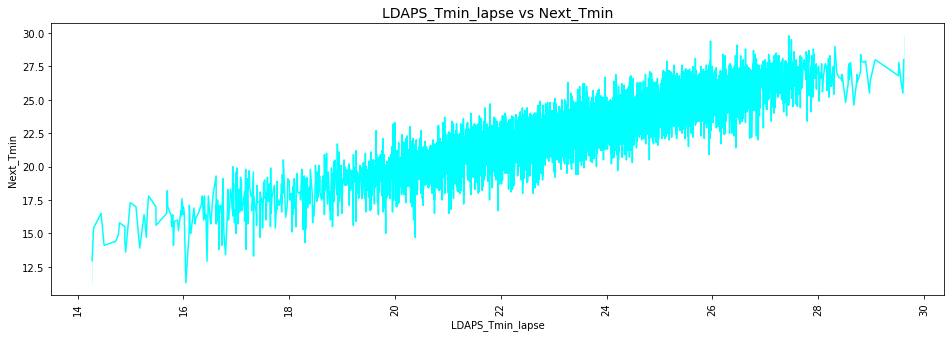

In [280]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_Tmin_lapse'], df['Next_Tmin'], color='aqua')
plt.title('LDAPS_Tmin_lapse vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

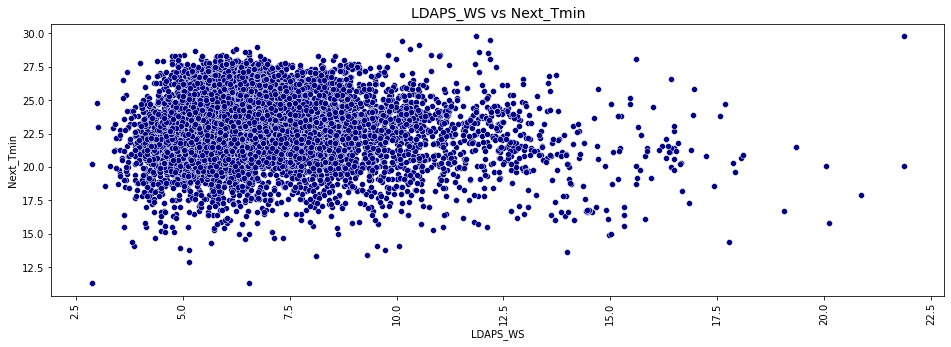

In [281]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_WS'], df['Next_Tmin'], color='navy')
plt.title('LDAPS_WS vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

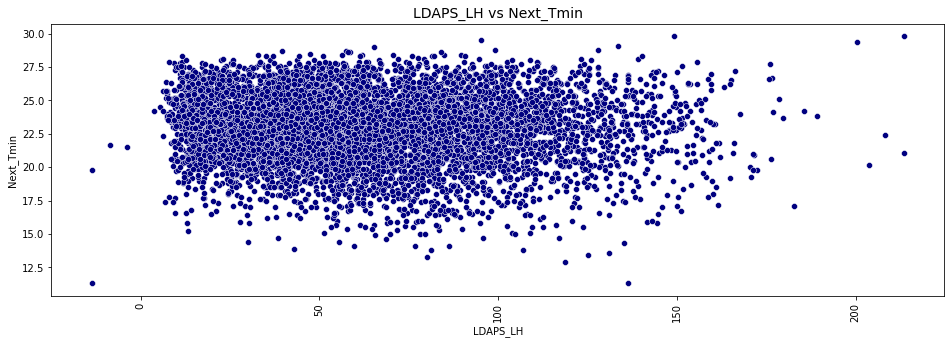

In [282]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_LH'], df['Next_Tmin'], color='navy')
plt.title('LDAPS_LH vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

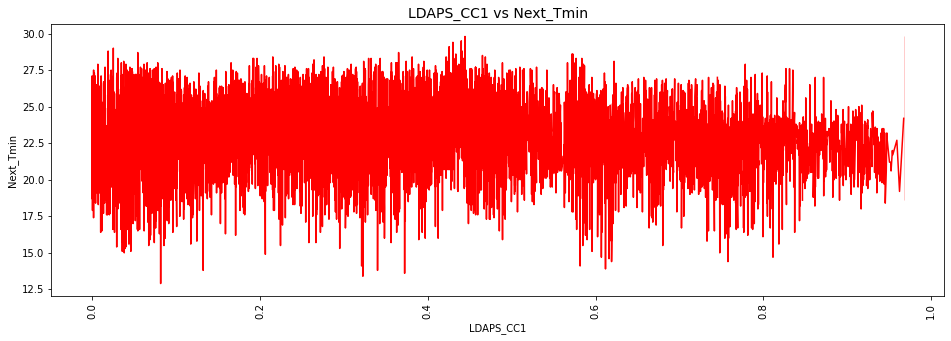

In [283]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_CC1'], df['Next_Tmin'], color='red')
plt.title('LDAPS_CC1 vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

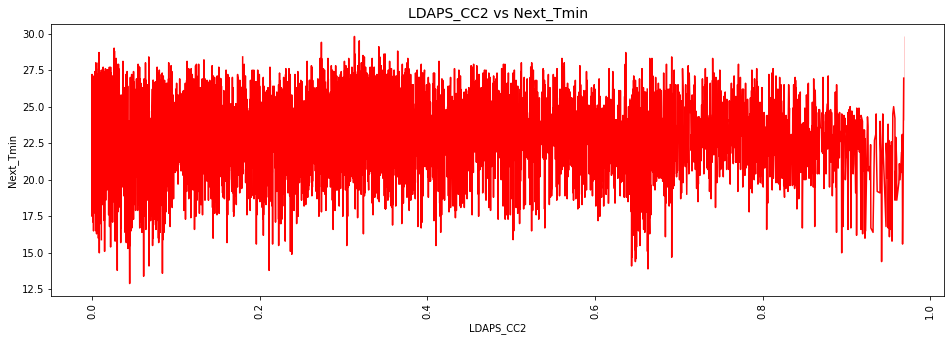

In [284]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_CC2'], df['Next_Tmin'],color='red')
plt.title('LDAPS_CC2 vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

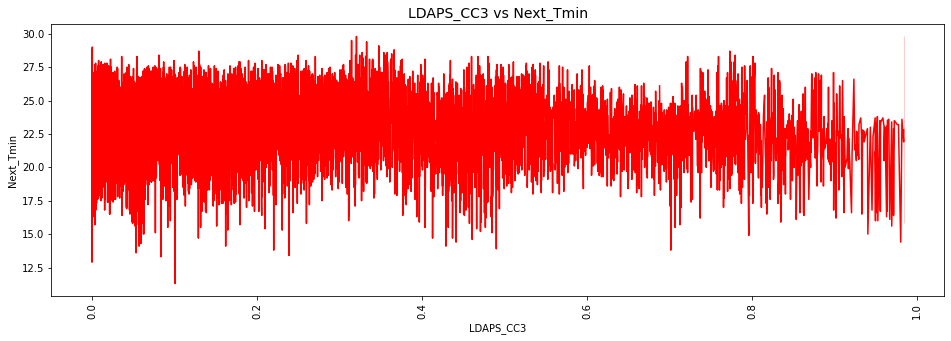

In [285]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_CC3'], df['Next_Tmin'],color='red')
plt.title('LDAPS_CC3 vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

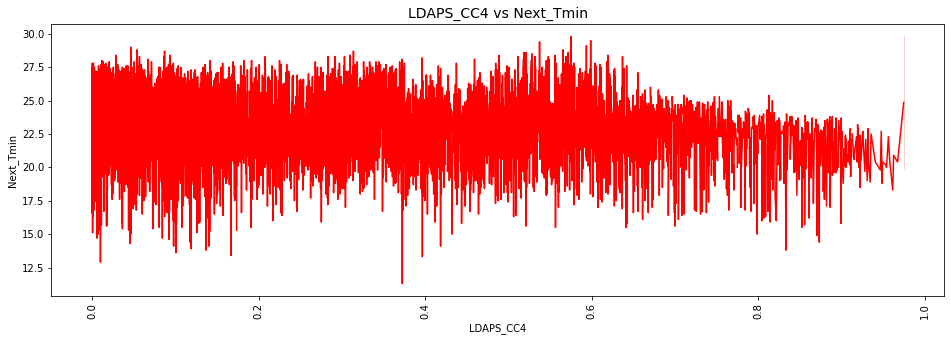

In [286]:
plt.figure(figsize=(16,5))
sns.lineplot(df['LDAPS_CC4'], df['Next_Tmin'],color='red')
plt.title('LDAPS_CC4 vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

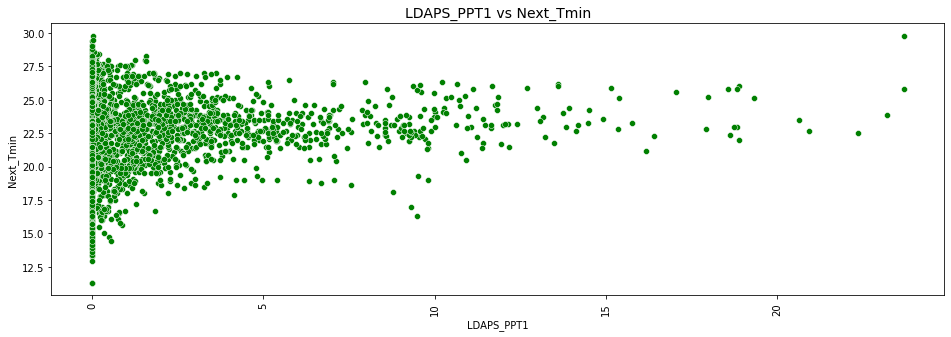

In [272]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_PPT1'], df['Next_Tmin'], color='green')
plt.title('LDAPS_PPT1 vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

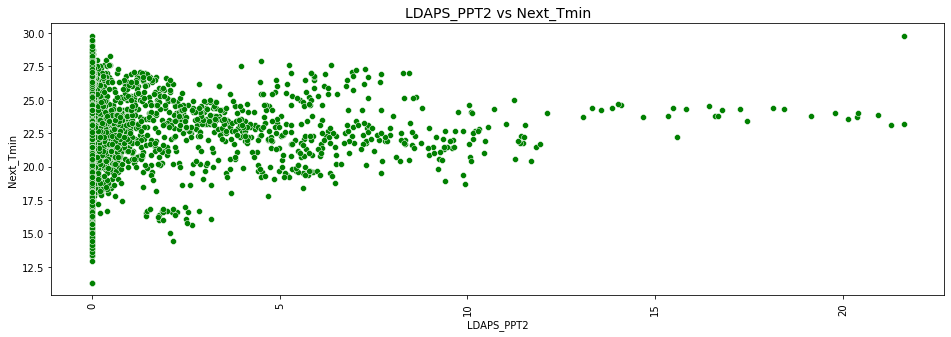

In [273]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_PPT2'], df['Next_Tmin'],color='green')
plt.title('LDAPS_PPT2 vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

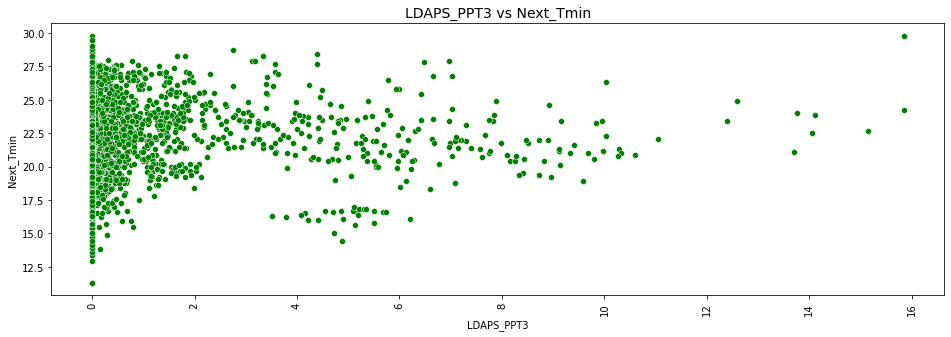

In [274]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_PPT3'], df['Next_Tmin'], color='green')
plt.title('LDAPS_PPT3 vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

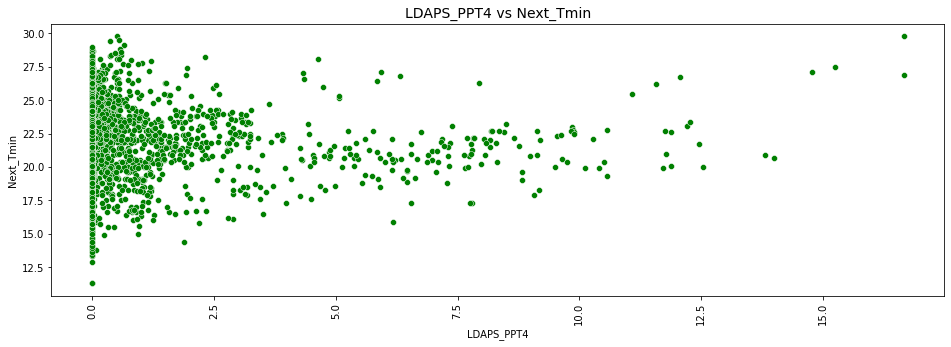

In [275]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['LDAPS_PPT4'], df['Next_Tmin'], color='green')
plt.title('LDAPS_PPT4 vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

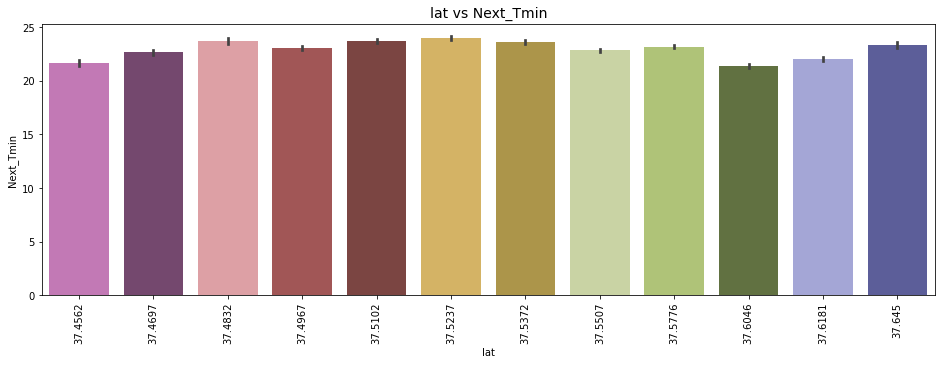

In [277]:
plt.figure(figsize=(16,5))
sns.barplot(df['lat'], df['Next_Tmin'], palette='tab20b_r')
plt.title('lat vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

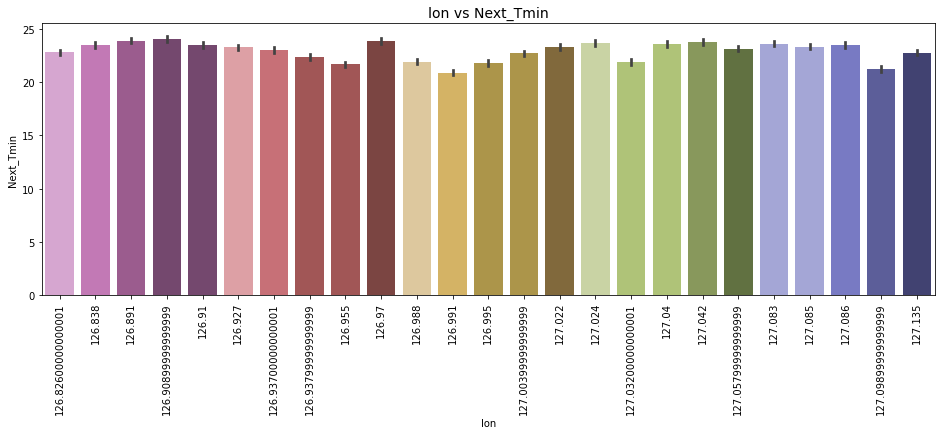

In [278]:
plt.figure(figsize=(16,5))
sns.barplot(df['lon'], df['Next_Tmin'], palette='tab20b_r')
plt.title('lon vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

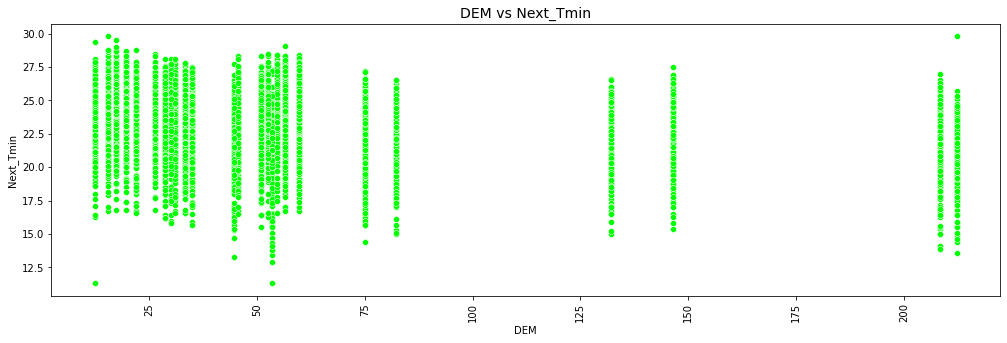

In [295]:
plt.figure(figsize=(17,5))
sns.scatterplot(df['DEM'], df['Next_Tmin'], color='lime')
plt.title('DEM vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

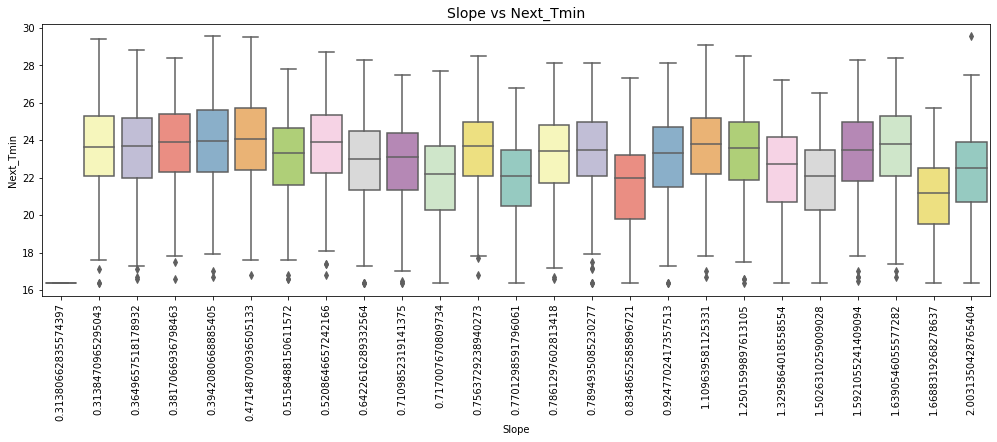

In [115]:
plt.figure(figsize=(17,5))
sns.boxplot(df['Slope'], df['Next_Tmin'], palette='Set3')
plt.title('Slope vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

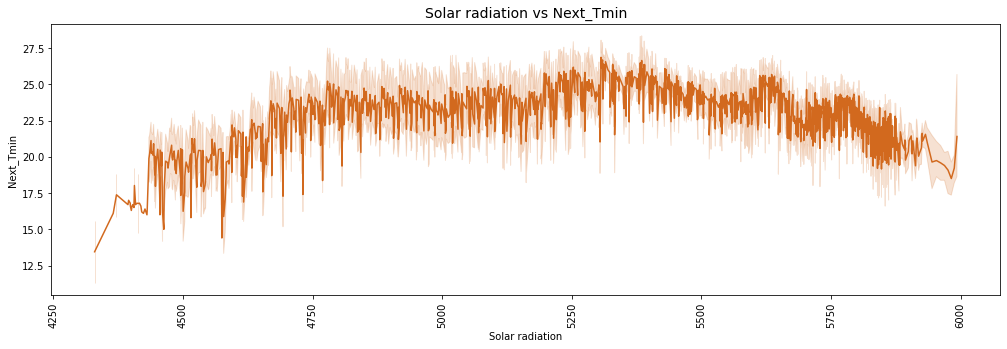

In [294]:
plt.figure(figsize=(17,5))
sns.lineplot(df['Solar radiation'], df['Next_Tmin'], color='chocolate')
plt.title('Solar radiation vs Next_Tmin', size=14)
plt.xticks(rotation=90)
plt.show()

###### Handling Outliers

In [63]:
fout =['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Next_Tmax','Next_Tmin']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

In [64]:
#Recheck for Outliers After Removing

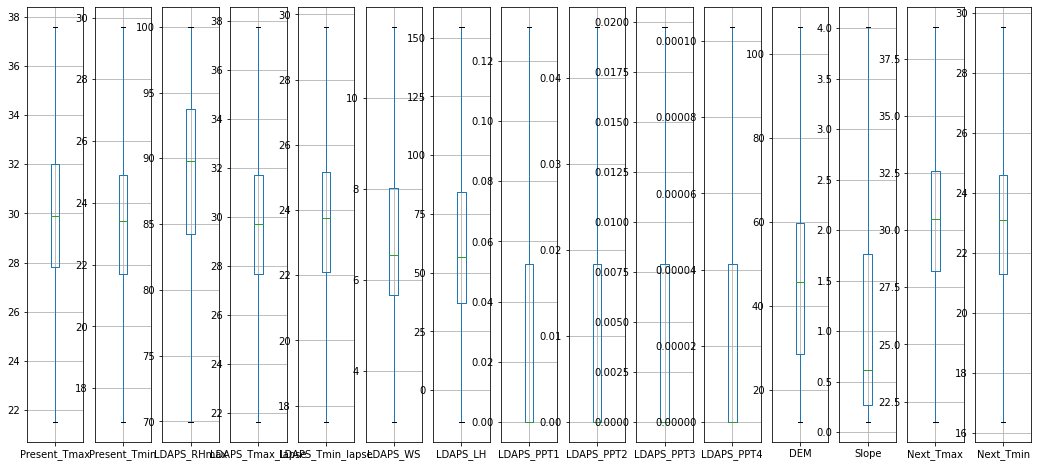

In [65]:
col1 =['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Next_Tmax','Next_Tmin']
fig, pltcan=plt.subplots(nrows=1, ncols=len(col1), figsize=(18,8))
for predcol , i in zip(col1, range(len(col1))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

In [66]:
df.shape

(7752, 25)

###### Handling Missing/Zeros Values

In [67]:
df['LDAPS_CC1'].replace(0,np.nan,inplace=True)
df['LDAPS_CC2'].replace(0,np.nan,inplace=True)
df['LDAPS_CC3'].replace(0,np.nan,inplace=True)
df['LDAPS_CC4'].replace(0,np.nan,inplace=True)


In [68]:
#nan values before removing

In [69]:
df.at[7750, 'station'] = 1.0
df.at[7751, 'station'] = 2.0
df['Date'].replace(np.nan,'31-08-2017',inplace=True)

In [70]:
df['col1'] = df['Next_Tmax'].shift(periods=1)
df['col2'] = df['Next_Tmin'].shift(periods=1)
df['Present_Tmax'].fillna(df['col1'], inplace=True)
df['Present_Tmin'].fillna(df['col2'], inplace=True)
df['LDAPS_Tmax_lapse'].fillna(df['col1'], inplace=True)
df['LDAPS_Tmin_lapse'].fillna(df['col2'], inplace=True)
df['col3'] = df['Present_Tmax'].shift(periods=-1)
df['col4'] = df['Present_Tmin'].shift(periods=-1)
df['Next_Tmax'].fillna(df['col3'], inplace=True)
df['Next_Tmin'].fillna(df['col4'], inplace=True)
df.drop(columns = ['col1', 'col2','col3','col4'],inplace=True,axis=1)

In [71]:
df.ffill(axis=0,inplace=True)

In [72]:
df.drop(columns = ['LDAPS_PPT1', 'LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'],inplace=True,axis=1)


In [73]:
#Recheck for missing and zero values

In [74]:
df.isnull().sum().sum()

0

In [75]:

print(df[df==0].count().sum())

0


###### Handling Cardinality/Converting Into Numerical

In [76]:
df[["Day", "Month", "Year"]] = df["Date"].str.split("-", expand=True)
df.drop('Date',inplace=True,axis=1)

In [77]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4      lat      lon       DEM   Slope  \
0   0.203896   0.161697   0.130928  37.6046  126.991  106.5310  2.7850   
1   0.251771   0.159444   0.127727  37.6046  127.032   44.7624  0.5141   
2   0.257469   0.204091   0.142125  37.5776  127.058   33.3068  0.2661   
3   0.226002   0.161157   0.134249  37.6450  127.022   45.7160  2.5348   
4   0.249995   0.178892   0.170021  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin Day Month  Year  
0      5992.895996       29.1       21.2  30    06  2013  
1      5869.312500       30.5       22.5  30    06  2013  
2      5863.555664       31.1       23.9  30    06  2013  
3      5856.964844       31.7       24.3  30    06  2013  
4      5859.552246       31.2       22.5  30    06  2013

In [78]:
df["Day"]= df["Day"].astype(int)
df["Month"]= df["Month"].astype(int)
df["Year"]= df["Year"].astype(int)

In [79]:
#Recheck for Datatype

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  lat               7752 non-null   float64
 14  lon               7752 non-null   float64
 15  DEM               7752 non-null   float64
 16  Slope             7752 non-null   float64


###### Handling Skewness

In [81]:
#Skweness before removing

In [82]:
print(df[['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','DEM','Slope','Solar radiation']].skew())
#df.skew().plot(kind='barh',color='#9467bd')

LDAPS_RHmax        -0.729298
LDAPS_Tmin_lapse   -0.424023
LDAPS_WS            0.825969
LDAPS_LH            0.607047
LDAPS_CC3           0.640863
LDAPS_CC4           0.667006
DEM                 0.729689
Slope               1.181127
Solar radiation    -0.511210
dtype: float64


In [83]:
#Removing Skweness

In [84]:
df[['LDAPS_RHmax']]= np.sqrt(df[['LDAPS_RHmax']])
df[['LDAPS_Tmin_lapse']]= np.sqrt(df[['LDAPS_Tmin_lapse']])
df[['LDAPS_WS']]= np.sqrt(df[['LDAPS_WS']])
df[['LDAPS_LH']]= np.sqrt(df[['LDAPS_LH']])
df[['LDAPS_CC3']]= np.sqrt(df[['LDAPS_CC3']])
df[['LDAPS_CC4']]= np.sqrt(df[['LDAPS_CC4']])
df[['DEM']]= np.sqrt(df[['DEM']])
df[['Slope']]= np.sqrt(df[['Slope']])
df[['Solar radiation']]= np.sqrt(df[['Solar radiation']])

In [85]:
#Recheck for Skewness

In [86]:
print(df[['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','DEM','Slope','Solar radiation']].skew())
#df.skew().plot(kind='barh',color='#9467bd')

LDAPS_RHmax        -0.815307
LDAPS_Tmin_lapse   -0.560622
LDAPS_WS            0.552785
LDAPS_LH            0.021101
LDAPS_CC3          -0.108947
LDAPS_CC4          -0.005231
DEM                 0.323922
Slope               0.663249
Solar radiation    -0.559208
dtype: float64


In [87]:
df.shape

(7752, 23)

###### Feature Selection

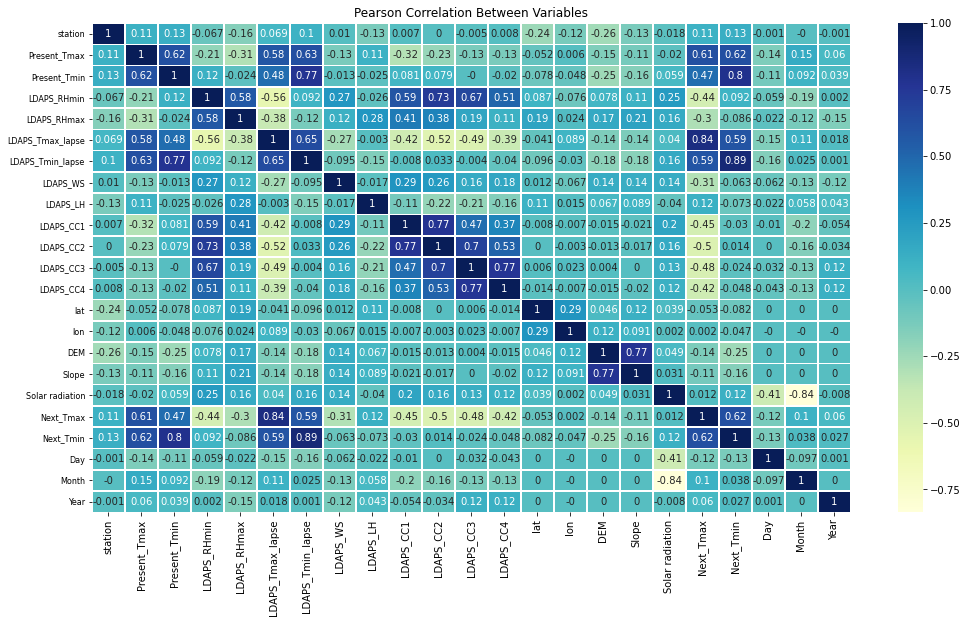

In [88]:
# Variable Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(17,9)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()        
    

In [89]:
# Anova Test 
cr=[]
ncr=[]
for i in df.columns:
    cg=df.groupby(['Next_Tmax','Next_Tmin'])[i].apply(list)
    av=stats.f_oneway(*cg)
    if av[1]<0.5:
        print(i,'------correlated------:',av[1],'\n')
        cr.append(i)
    else:
        print(i,'------not correlated-----:',av[1],'\n')
        ncr.append(i)
#print("Correlated     :\n",cr)
#print("\nNon Correlated :",ncr)

station ------correlated------: 0.01902437892057204 

Present_Tmax ------correlated------: 6.02452999630223e-165 

Present_Tmin ------correlated------: 1.7261246084575e-311 

LDAPS_RHmin ------correlated------: 3.0023024741790275e-134 

LDAPS_RHmax ------correlated------: 7.153110496658746e-15 

LDAPS_Tmax_lapse ------correlated------: 0.0 

LDAPS_Tmin_lapse ------correlated------: 0.0 

LDAPS_WS ------correlated------: 6.1861034070031165e-28 

LDAPS_LH ------not correlated-----: nan 

LDAPS_CC1 ------correlated------: 3.934075337637178e-50 

LDAPS_CC2 ------correlated------: 1.3554816868505468e-121 

LDAPS_CC3 ------correlated------: 2.6665496424964024e-96 

LDAPS_CC4 ------correlated------: 2.2945683153530643e-43 

lat ------correlated------: 0.0005878239806586875 

lon ------correlated------: 0.4772091742475014 

DEM ------correlated------: 0.010532886621398172 

Slope ------correlated------: 0.021044805782157276 

Solar radiation ------correlated------: 2.424682762198384e-19 

Next

In [90]:
cor = df.corr()
ctarget = abs(cor['Next_Tmax'])
rfeatature = ctarget[ctarget>.2]
result1=rfeatature.keys().to_list()
print('strong correlated :',result1)

rfeatature = ctarget[ctarget<0.2]
result2=rfeatature.keys().to_list()
print('\nweak correlated :',result2)

strong correlated : ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'Next_Tmax', 'Next_Tmin']

weak correlated : ['station', 'LDAPS_LH', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Day', 'Month', 'Year']


In [91]:
cor = df.corr()
ctarget = abs(cor['Next_Tmin'])
rfeatature = ctarget[ctarget>.2]
result1=rfeatature.keys().to_list()
print('strong correlated :',result1)

rfeatature = ctarget[ctarget<0.2]
result2=rfeatature.keys().to_list()
print('\nweak correlated :',result2)

strong correlated : ['Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'DEM', 'Next_Tmax', 'Next_Tmin']

weak correlated : ['station', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'lat', 'lon', 'Slope', 'Solar radiation', 'Day', 'Month', 'Year']


In [92]:
df.drop(['station','LDAPS_LH','Day','Month','Year'],inplace=True,axis=1)

###### split target and feature variables

In [93]:
y_train=df[['Next_Tmax','Next_Tmin']]
X_train=df.drop(['Next_Tmax','Next_Tmin'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (7752, 2)
X_train : (7752, 16)


In [94]:
#strong correlated : ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','DEM','Solar radiation','lon','lat','Slope']

                                    

In [95]:
#selected features

In [96]:
X_train.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_CC1',
       'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation'],
      dtype='object')

In [97]:
y_train.columns

Index(['Next_Tmax', 'Next_Tmin'], dtype='object')

###### Normilization of data

In [98]:
from sklearn.preprocessing import power_transform
X=power_transform(X_train,method='yeo-johnson')
X

array([[-0.40839187, -0.79846121,  0.17759303, ...,  1.54371876,
         1.30967789,  1.84973341],
       [ 0.70041554, -0.71925344, -0.2359752 , ...,  0.04149681,
        -0.3148781 ,  1.40082719],
       [ 0.59165068, -0.01938751, -0.49543576, ..., -0.43170328,
        -0.90230429,  1.38076792],
       ...,
       [-2.04936774, -2.24348137, -2.80805843, ..., -1.23119635,
        -0.88587223, -1.74464837],
       [-2.48884362, -2.40538416, -3.17646692, ..., -1.86981199,
        -1.6624378 , -1.88695331],
       [ 2.95618994,  3.03935759,  2.47905621, ...,  1.54371876,
         1.64626727,  1.84973341]])

###### Splitting Dataset into train and test set

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_train, test_size = 0.25, random_state = 44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5814, 16)
(5814, 2)
(1938, 16)
(1938, 2)


###### Sandardization of data

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[-0.99732697  0.2468317  -0.31516911 ...  0.30715315  0.7689663
   0.02372891]
 [-0.7482174  -0.17886207  0.43887082 ...  1.54468135  1.663819
   0.68031738]
 [ 1.53768848  0.42168431 -0.11938077 ...  0.07769173  1.23635397
   0.37563456]
 ...
 [-1.78591262 -1.50347949  0.24843349 ...  0.04320245 -0.30684037
  -1.13119121]
 [ 1.15565511 -1.20892732 -0.87851136 ...  0.3372288  -0.01818327
   0.92894796]
 [ 0.85797594  1.71860292  0.03523553 ...  0.25602324 -0.5101787
  -1.17809646]]
[[-0.61651775  0.1711275  -0.31565171 ...  1.54085518  1.59567451
  -0.2411887 ]
 [ 1.46299274  0.48255122  1.34877969 ...  0.36726064 -1.39283992
   1.28897237]
 [-0.81020041 -1.22556476  0.46920076 ... -0.35772949 -0.35422756
  -1.01150103]
 ...
 [-2.55111645 -2.46104704 -3.17884888 ... -1.8778173  -1.66796141
  -1.86397118]
 [ 0.77742967  1.85905593  1.54962818 ... -1.56219647 -1.34495504
   0.5454733 ]
 [-0.38547393 -1.59959214 -0.65184428 ...  0.03637047 -0.33875734
   1.24502514]]


###### Model Building

In [101]:
#Linear Regression

In [913]:
LRregressor = LinearRegression()
LRregressor.fit(x_train, y_train)
LRy_pred = LRregressor.predict(x_test)
print(LRy_pred[0])

[29.64634379 22.43663968]


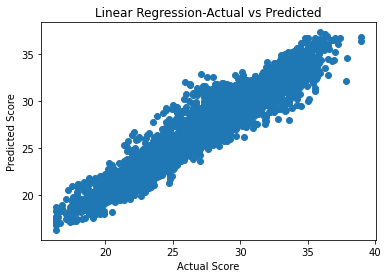

In [914]:
plt.scatter(y_test,LRy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()

In [915]:
#Evaluation

In [916]:
# Calculating R2 Score
LRr2_score_train =LRregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',LRr2_score_train)
LRr2_score_test=LRregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',LRr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, LRy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, LRy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LRy_pred)))


r2 Score On Train Data: 0.7981092534588168

r2 Score On Test Data: 0.7820272857202388


Mean Absolute Error: 1.0108836901844942

Mean Squared Error: 1.7713918022785058

Root Mean Squared Error: 1.3309364381060824


In [917]:
#Validation

In [918]:
LRscores = cross_val_score(LRregressor,x_train, y_train, cv=5)
print('\nCross Validation')
print('Linear Regression Score:',LRscores)
LRcross=round(LRscores.mean(),4)
print('Average LinearRegression score:',LRcross)


Cross Validation
Linear Regression Score: [0.78158603 0.7974773  0.80323669 0.81222824 0.78727374]
Average LinearRegression score: 0.7964


In [919]:
#Lasso Regressor

In [920]:
LSregressor = Lasso()
LSregressor.fit(x_train, y_train)
LSy_pred = LSregressor.predict(x_test)
print(LSy_pred[0])

[29.93288286 22.7596719 ]


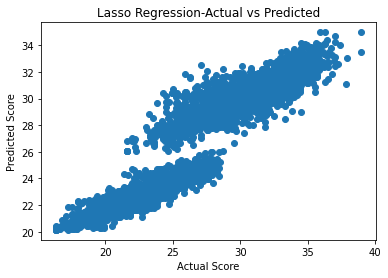

In [921]:
plt.scatter(y_test,LSy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Lasso Regression-Actual vs Predicted')
plt.show()

In [922]:
#Evaluation

In [923]:
# Calculating R2 Score
LSr2_score_train =LSregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',LSr2_score_train)
LSr2_score_test=LSregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',LSr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, LSy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, LSy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LSy_pred)))


r2 Score On Train Data: 0.6095456860414694

r2 Score On Test Data: 0.6016797850827906


Mean Absolute Error: 1.4137231530318868

Mean Squared Error: 3.146269526485603

Root Mean Squared Error: 1.7737726817395747


In [924]:
#validation

In [925]:
LSscores = cross_val_score(LSregressor,x_train, y_train, cv=5)
print('\nCross Validation')
print('Lasso Regression Score:',LSscores)
LScross=round(LSscores.mean(),4)
print('Average Lasso Regression score:',LScross)


Cross Validation
Lasso Regression Score: [0.60691682 0.60572785 0.61496455 0.61354537 0.60236149]
Average Lasso Regression score: 0.6087


In [926]:
# DecisionTree Regressor

In [927]:
DTregressor =  DecisionTreeRegressor(max_depth=6,criterion='mse')
DTregressor.fit(x_train, y_train)
DTy_pred = DTregressor.predict(x_test)
print(DTy_pred[0])

[28.15054348 22.32608696]


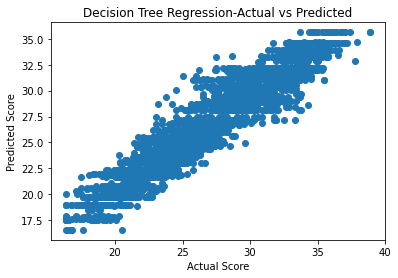

In [928]:
plt.scatter(y_test,DTy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Decision Tree Regression-Actual vs Predicted')
plt.show()

In [929]:
#Evaluation

In [930]:
# Calculating R2 Score
DTr2_score_train =DTregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',DTr2_score_train)
DTr2_score_test=DTregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',DTr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test,DTy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test,DTy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,DTy_pred)))



r2 Score On Train Data: 0.7891315421539546

r2 Score On Test Data: 0.7465493874274585


Mean Absolute Error: 1.096754919242887

Mean Squared Error: 1.9936622054747573

Root Mean Squared Error: 1.4119710356359145


In [931]:
#Validation

In [932]:
DTscores = cross_val_score(DTregressor,x_train, y_train, cv=5)
print('\nCross Validation')
print('Decision Tree Regression Score:',DTscores)

DTcross=round(DTscores.mean(),4)
print('Average Decision Tree Regression score:',DTcross)


Cross Validation
Decision Tree Regression Score: [0.73669748 0.74605091 0.76241372 0.77869491 0.73814493]
Average Decision Tree Regression score: 0.7524


In [933]:
#RandomForest Regressor

In [934]:
RFregressor = RandomForestRegressor()
RFregressor.fit(x_train, y_train)
RFy_pred = RFregressor.predict(x_test)
print(RFy_pred[0])

[30.076 22.9  ]


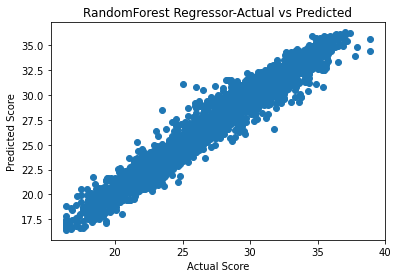

In [935]:
plt.scatter(y_test,RFy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('RandomForest Regressor-Actual vs Predicted')
plt.show()

In [936]:
#Evaluation

In [937]:
# Calculating R2 Score
RFr2_score_train =RFregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',RFr2_score_train)
RFr2_score_test=RFregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',RFr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, RFy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, RFy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RFy_pred)))


r2 Score On Train Data: 0.9846651982880601

r2 Score On Test Data: 0.8820756916158956


Mean Absolute Error: 0.7229891640866875

Mean Squared Error: 0.9398297598039227

Root Mean Squared Error: 0.9694481728302564


In [938]:
#validation

In [940]:
RFscores = cross_val_score(RFregressor,x_train, y_train, cv=5)
print('\nCross Validation')
print('Random Forest Regression Score:',RFscores)

RFcross=round(RFscores.mean(),4)
print('Average Random Forest Regression score:',RFcross)


Cross Validation
Random Forest Regression Score: [0.88077703 0.87619461 0.88880598 0.89232408 0.87608123]
Average Random Forest Regression score: 0.8828


In [941]:
#KNeighbors Regressor

In [942]:
KNNregressor =  KNeighborsRegressor(n_neighbors=2)
KNNregressor.fit(x_train, y_train)
KNNy_pred = KNNregressor.predict(x_test)
print(KNNy_pred[0])

[29.35 23.65]


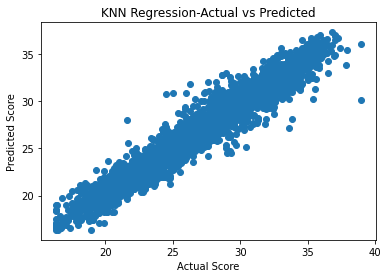

In [943]:
plt.scatter(y_test,KNNy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('KNN Regression-Actual vs Predicted')
plt.show()

In [944]:
#Evaluation

In [945]:
# Calculating R2 Score
KNNr2_score_train =KNNregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',KNNr2_score_train)
KNNr2_score_test=KNNregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',KNNr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, KNNy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, KNNy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, KNNy_pred)))


r2 Score On Train Data: 0.9525409206319844

r2 Score On Test Data: 0.8516521932952774


Mean Absolute Error: 0.7845007739938076

Mean Squared Error: 1.1805954914860677

Root Mean Squared Error: 1.0865521117213237


In [946]:
#Validation

In [947]:
KNNscores = cross_val_score(KNNregressor,x_train, y_train, cv=5)
print('\nCross Validation')
print('KNN Regression Score:',KNNscores)
KNNcross=round(KNNscores.mean(),4)
print('Average KNN Regression score:',KNNcross)


Cross Validation
KNN Regression Score: [0.83220571 0.83799345 0.85318379 0.84702178 0.84224846]
Average KNN Regression score: 0.8425


In [955]:
#Ridge Regressor

In [957]:
RRregressor =  Ridge()
RRregressor.fit(x_train, y_train)
RRy_pred = RRregressor.predict(x_test)
print(RRy_pred[0])

[29.64781831 22.43632189]


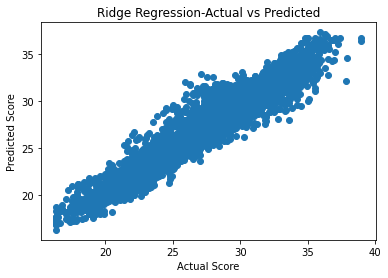

In [958]:
plt.scatter(y_test,RRy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Ridge Regression-Actual vs Predicted')
plt.show()

In [959]:
#Evaluation

In [960]:
# Calculating R2 Score
RRr2_score_train =RRregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',RRr2_score_train)
RRr2_score_test=RRregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',RRr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, RRy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, RRy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RRy_pred)))


r2 Score On Train Data: 0.7981091892453132

r2 Score On Test Data: 0.7820289452405411


Mean Absolute Error: 1.010876476126

Mean Squared Error: 1.7713770983365742

Root Mean Squared Error: 1.3309309141862227


In [ ]:
#Validation

In [961]:
RRscores = cross_val_score(RRregressor,x_train, y_train, cv=5)
print('\nCross Validation')
print('Ridge Regression Score:',RRscores)
RRcross=round(RRscores.mean(),4)
print('Average Ridge Regression score:',RRcross)


Cross Validation
Ridge Regression Score: [0.78158496 0.79748475 0.80324435 0.81222085 0.78727026]
Average Ridge Regression score: 0.7964


###### Compare Models

In [964]:
trainscore=[LRr2_score_train,LSr2_score_train,RRr2_score_train,DTr2_score_train,RFr2_score_train,KNNr2_score_train]
testscore=[LRr2_score_test,LSr2_score_test,RRr2_score_test,DTr2_score_test,RFr2_score_test,KNNr2_score_test]
VAlscore=[LRcross,LScross,RRcross,DTcross,RFcross,KNNcross]
col={'Train Score':trainscore,'Test Score':testscore,'Validation':VAlscore}
models=['Linear Regression','Lasso','Ridge','Decision Tree','Random Forest','KNN']
dfp=pd.DataFrame(data=col,index=models)
dfp

Train Score  Test Score  Validation
Linear Regression     0.798109    0.782027      0.7964
Lasso                 0.609546    0.601680      0.6087
Ridge                 0.798109    0.782029      0.7964
Decision Tree         0.789132    0.746549      0.7524
Random Forest         0.984665    0.882076      0.8828
KNN                   0.952541    0.851652      0.8425

<AxesSubplot:>

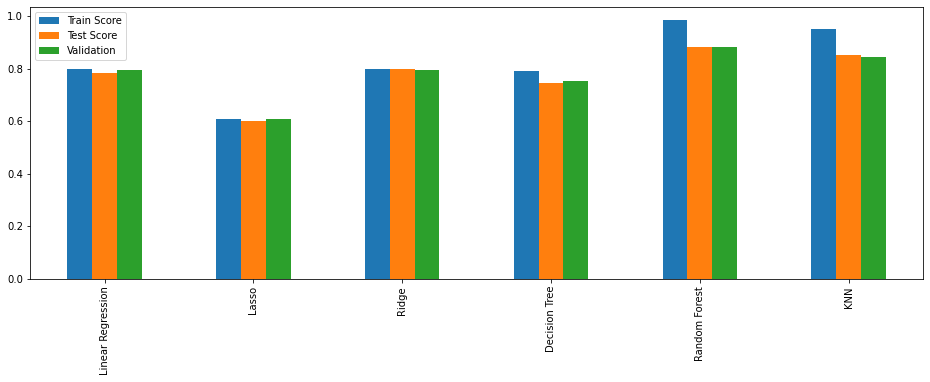

In [963]:
dfp.plot(kind='bar',figsize=(16,5))

###### Hyperparameter Tunining

In [ ]:
#for Linear Regression

In [967]:
fit_intercept=[True,False]
normalize=[True,False]
copy_X=[True,False]
positive=[True,False]
n_jobs= [1,5,10, 100,200,500]
param_distributions = dict(fit_intercept=fit_intercept,
                           normalize=normalize,
                           copy_X=copy_X,
                           positive=positive,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=LRregressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Score:  0.7963604019874433
Best Params:  {'positive': False, 'normalize': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}


In [965]:
#for Ridge

In [966]:
alpha=[1.5,2.0,2.4,3.0,3.5,4.0,4.3,5.0]
fit_intercept=[True,False]
normalize=[True,False]
copy_X=[True,False]
max_iter=[2,3,4,10,25,50,100,200,500]
solver=['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']

param_distributions = dict(alpha=alpha,
                           fit_intercept=fit_intercept,
                           normalize=normalize,
                           copy_X=copy_X,
                           max_iter=max_iter,
                           solver= solver)

random = RandomizedSearchCV(estimator=RRregressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.796379793304397
Best Params:  {'solver': 'sag', 'normalize': False, 'max_iter': 25, 'fit_intercept': True, 'copy_X': True, 'alpha': 2.4}


In [ ]:
#for KNN

In [968]:
n_neighbors= [1,5,4,10,30,15,20,100]
weights=['uniform','distance']
algorithm=['auto','ball_tree','kd_tree','brute']
leaf_size=[1,2,4,6,12,10,25,50]
p=[1,2,5,7,10,20,24]
n_jobs= [1,5,10, 100,200,500]

param_distributions = dict(n_neighbors=n_neighbors,
                           weights=weights,
                           algorithm=algorithm,
                           leaf_size=leaf_size,
                           p=p,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=KNNregressor,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  nan
Best Params:  {'weights': 'distance', 'p': 1, 'n_neighbors': 10, 'n_jobs': 200, 'leaf_size': 10, 'algorithm': 'brute'}


In [ ]:
#for Random Forest Regressor

In [969]:
n_estimators=[10, 50,5,90, 200, 110, 500]
criterion = ['mse','mae']
max_depth = [2,4,6,8,10]
min_samples_split=[1,5,3,1.5,3.9,10]
min_samples_leaf=[1.4,3,2.6,9.3,1.5]
min_weight_fraction_leaf=[1.4,3.5,1.2,0.5]
max_features=['auto','sqrt','log2']
max_leaf_nodes=[4,6,12,10,25,50]
verbose = [1,5,4,10,15]
random_state= [1,5,10, 100,200,500]
n_jobs= [1,5,10, 100,200]

param_distributions = dict(n_estimators=n_estimators,
                           criterion = criterion,
                           max_depth = max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           max_leaf_nodes=max_leaf_nodes,
                           verbose = verbose,
                           random_state= random_state,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=RFregressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=100)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.1s


building tree 1 of 200building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200

building tree 6 of 200building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200

building tree 11 of 200
building tree 12 of 200
building tree 13 of 200building tree 14 of 200
building tree 15 of 200

building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200building tree 20 of 200

building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200building tree 25 of 200building tree 26 of 200
building tree 27 of 200

building tree 28 of 200building tree 29 of 200

building tree 30 of 200building tree 31 of 200
building tree 32 of 200building tree 33 of 200

building tree 34 of 200
building tree 35 of 200
building tree 36 of 200

building tree 37 of 200

building tree 38 of 200
building tree 39 of 200building tree 40 of 200building tree 41 of 200building tree 42 of 200build

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:    0.3s


building tree 81 of 200

building tree 82 of 200
building tree 83 of 200
building tree 84 of 200building tree 85 of 200building tree 86 of 200building tree 87 of 200building tree 88 of 200building tree 89 of 200



building tree 90 of 200


building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200building tree 95 of 200building tree 96 of 200


building tree 97 of 200
building tree 98 of 200building tree 99 of 200building tree 100 of 200

building tree 101 of 200

building tree 102 of 200
building tree 103 of 200building tree 104 of 200

building tree 105 of 200building tree 106 of 200
building tree 107 of 200
building tree 108 of 200building tree 109 of 200


building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200building tree 115 of 200

building tree 116 of 200
building tree 117 of 200building tree 118 of 200

building tree 119 of 200building tree 120 of 200building tree 121 of

[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:    0.5s


building tree 125 of 200building tree 126 of 200building tree 127 of 200building tree 128 of 200building tree 129 of 200building tree 130 of 200





building tree 131 of 200building tree 132 of 200
building tree 133 of 200building tree 134 of 200


building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200building tree 140 of 200

building tree 141 of 200building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200building tree 147 of 200

building tree 148 of 200

building tree 149 of 200
building tree 150 of 200building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200

building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200


[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed:    0.7s


building tree 177 of 200building tree 178 of 200

building tree 179 of 200



building tree 180 of 200
building tree 181 of 200building tree 182 of 200building tree 183 of 200building tree 184 of 200building tree 185 of 200building tree 186 of 200





building tree 187 of 200building tree 188 of 200building tree 189 of 200
building tree 190 of 200

building tree 191 of 200

building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200building tree 197 of 200

building tree 198 of 200
building tree 199 of 200
building tree 200 of 200
Best Score:  0.07882283884368949
Best Params:  {'verbose': 10, 'random_state': 100, 'n_jobs': 10, 'n_estimators': 200, 'min_weight_fraction_leaf': 0.5, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_leaf_nodes': 50, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'mse'}


[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.8s finished


###### Final MOdel

*Choosing the Ridge as Final Model*
<br>*Ridge Test Accuray,Train Accuracy and Final Accuracy Score is approx same*
<br>*Accuracy score doesn't reduced like other Models*
<br>*Best Score after Hyperparameter tuning is also same*

###### REtraining MOdel

In [975]:
y_train=df[['Next_Tmax','Next_Tmin']]
X_train=df.drop(['Next_Tmax','Next_Tmin'],axis=1)

In [976]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(X_train)
x_train=PScalerFit.transform(X_train)
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)

x_train : (7752, 16)
y_train : (7752, 2)


In [977]:
regressor =Ridge(solver='sag',normalize=False, max_iter=25,fit_intercept=True,copy_X=True,alpha=2.4)
Final_Model=regressor.fit(x_train,y_train)

# Calculating R2 Score
r2_score =regressor.score(x_train, y_train)
print('Final Score:',r2_score)

Final Score: 0.7987741526157904


###### Model Saving

In [978]:
import pickle
filename='TempForecast.pk1'
pickle.dump(regressor,open(filename,'wb'))
print("Model Saved")

Model Saved
